In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Comparing old vs new software changes

In [13]:
def plot(shutter_close, shutter_open, cb_data):
    sc = pd.read_csv(shutter_close, header=None)
    so = pd.read_csv(shutter_open, header=None)
    cb_data = pd.read_csv(cb_data, header=None)
    
    fig, ax = plt.subplots(2, 2, figsize=(15, 5))
    fig.tight_layout(h_pad=5.0)

    ax[0, 0].set_title("Shutter timing (time series)")
    ax[0, 0].plot(sc, alpha=0.5, label="Closed", markersize=2)
    ax[0, 0].plot(so, alpha=0.5, label="Open", markersize=2)
    ax[0, 0].set_xlabel("Index")
    ax[0, 0].set_ylabel("TIme (s)")
    ax[0, 0].legend()

    bins=50
    ax[0, 1].set_title("Shutter timing histogram")
    ax[0, 1].hist(sc*1000, bins=bins, alpha=0.5, label="Closed", range=(250, 1250))
    ax[0, 1].hist(so*1000, bins=bins, alpha=0.5, label="Open", range=(250, 1250))
    ax[0, 1].set_xlabel("Time (ms)")
    ax[0, 1].set_ylabel("Count")
    ax[0, 1].legend()

    ax[1, 0].set_title("Adjacent close - open period differences")
    ax[1, 0].hist((sc.values-so)*1000, bins=50, range=(-500, 500));
    ax[1, 0].set_xlabel("Difference in time (ms)")
    ax[1, 0].set_ylabel("Count")
    
    ax[1, 1].set_title("_cb_adc_data_ready() Run Time")
    ax[1, 1].hist(cb_data*1000, bins=50, range=(0, 50))
    ax[1, 1].set_xlabel("Time (ms)")
    ax[1, 1].set_ylabel("Count")
    
    plt.figure(figsize=(15, 5))
    plt.plot(cb_data*1000, 'o', markersize=1)

    print(f"Closed stats: {np.mean(sc.values):.3f} s +/- {np.std(sc.values):.3f}")
    print(f"Open stats: {np.mean(so.values):.3f} s +/- {np.std(so.values):.3f}")
    print(f"Mean of difference, closed - open: {np.mean(sc.values-so.values)*1000:.3f} ms +/- {np.std(sc.values-so.values)*1000:.3f}")
    print(f"_cb_adc_data() Run Time: {np.mean(cb_data.values)*1000:.3f} ms +/- {np.std(cb_data.values)*1000:.3f}")

### New code w/ logging : 600s exposure : Luminometer 6

Closed stats: 0.816 s +/- 0.047
Open stats: 0.815 s +/- 0.047
Mean of difference, closed - open: 1.846 ms +/- 75.346
_cb_adc_data() Run Time: 12.465 ms +/- 15.470


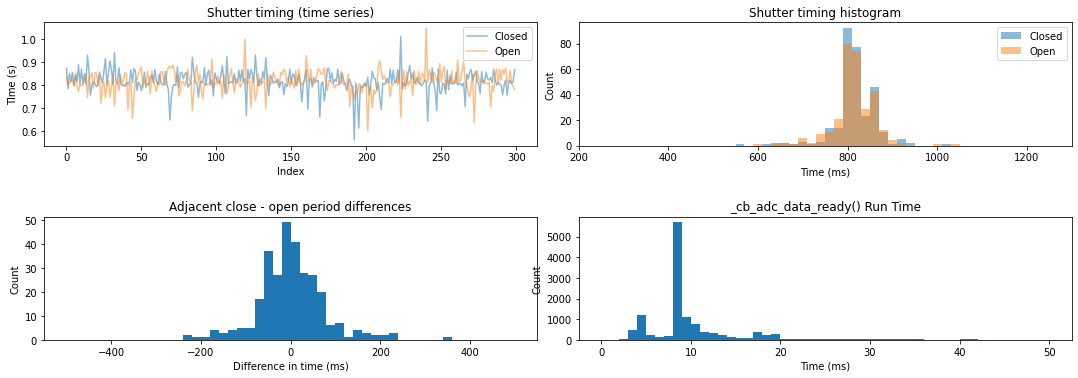

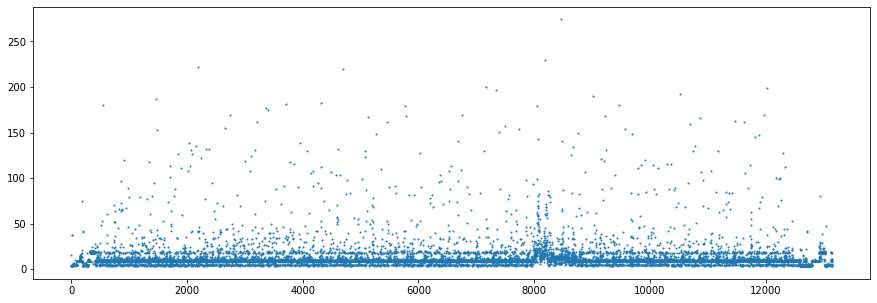

In [14]:
shutter_close = "lumi6/l6-600s-new/2021-Aug-13-23:53:17-shutter_close.csv"
shutter_open = "lumi6/l6-600s-new/2021-Aug-13-23:53:17-shutter_open.csv"
cb_data = "lumi6/l6-600s-new/2021-Aug-13-23:53:17-cb_timing.csv"
plot(shutter_close, shutter_open, cb_data)

### New code without logging : 600s exposure : Luminometer 6

Closed stats: 0.851 s +/- 0.041
Open stats: 0.845 s +/- 0.042
Mean of difference, closed - open: 6.487 ms +/- 70.795
_cb_adc_data() Run Time: 12.219 ms +/- 15.193


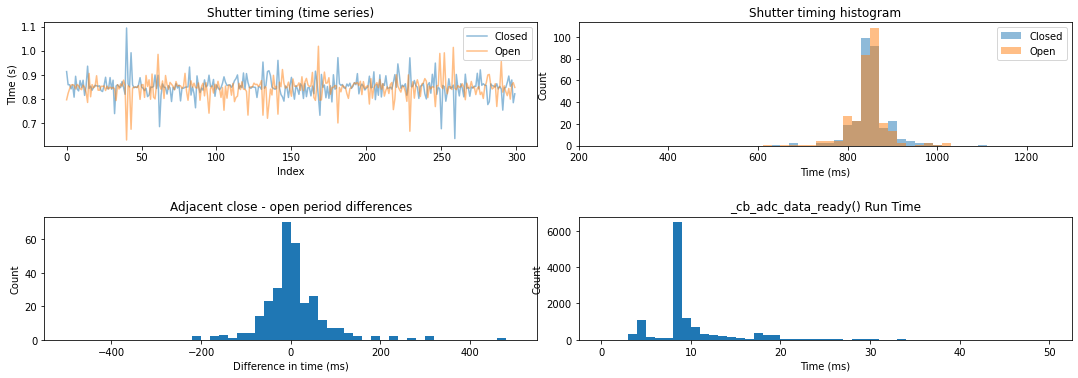

In [4]:
shutter_close = "lumi6/l6-600s-new-nolog/2021-Aug-13-23:27:31-shutter_close.csv"
shutter_open = "lumi6/l6-600s-new-nolog/2021-Aug-13-23:27:31-shutter_open.csv"
cb_data = "lumi6/l6-600s-new-nolog/2021-Aug-13-23:27:31-cb_timing.csv"
plot(shutter_close, shutter_open, cb_data)

### Old code : 600s exposure : Luminometer 6

Closed stats: 0.844 s +/- 0.023
Open stats: 0.847 s +/- 0.023
Mean of difference, closed - open: -3.477 ms +/- 37.100
_cb_adc_data() Run Time: 8.852 ms +/- 3.178


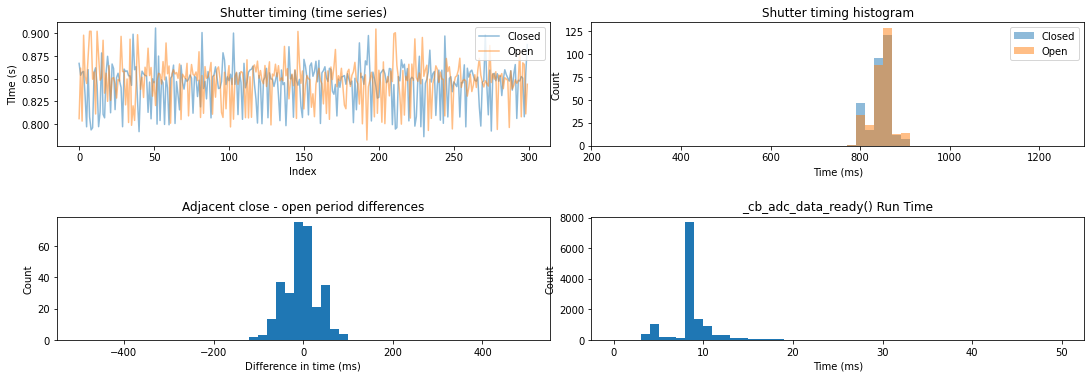

In [5]:
shutter_close = "lumi6/l6-600s-old/2021-Aug-14-00:40:58-shutter_close.csv"
shutter_open = "lumi6/l6-600s-old/2021-Aug-14-00:40:58-shutter_open.csv"
cb_data = "lumi6/l6-600s-old/2021-Aug-14-00:40:58-cb_timing.csv"
plot(shutter_close, shutter_open, cb_data)

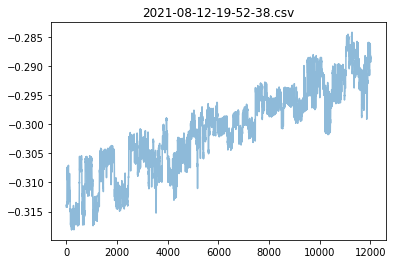

2021-08-12-19-52-38.csv


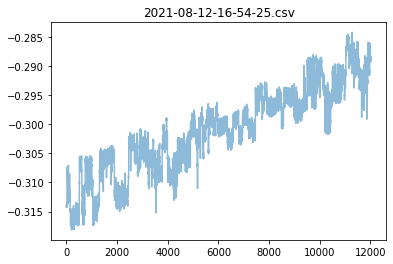

2021-08-12-16-54-25.csv


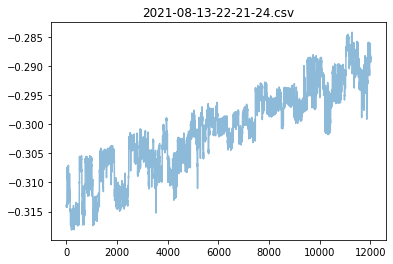

2021-08-13-22-21-24.csv


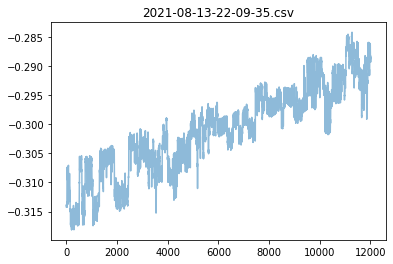

2021-08-13-22-09-35.csv


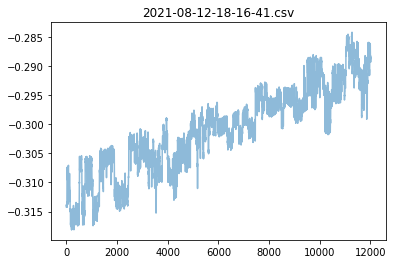

2021-08-12-18-16-41.csv


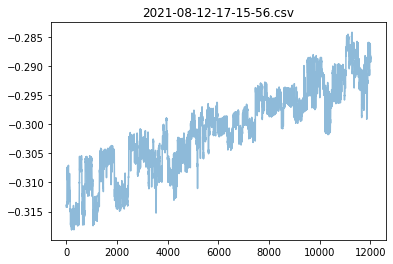

2021-08-12-17-15-56.csv


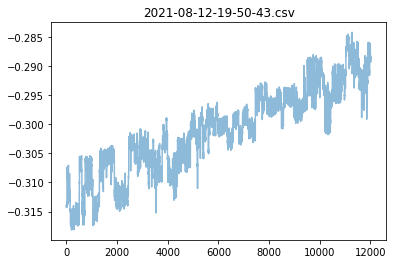

2021-08-12-19-50-43.csv


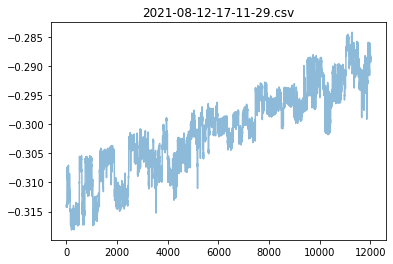

2021-08-12-17-11-29.csv


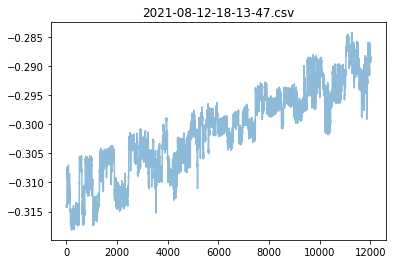

2021-08-12-18-13-47.csv


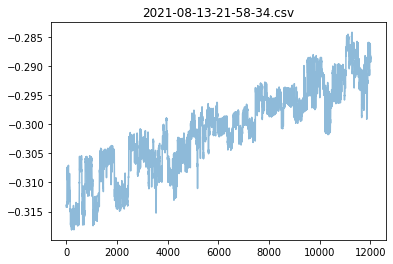

2021-08-13-21-58-34.csv


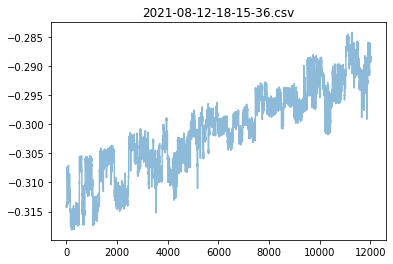

2021-08-12-18-15-36.csv


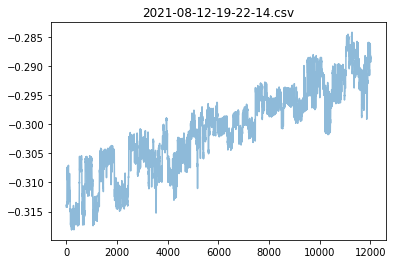

2021-08-12-19-22-14.csv


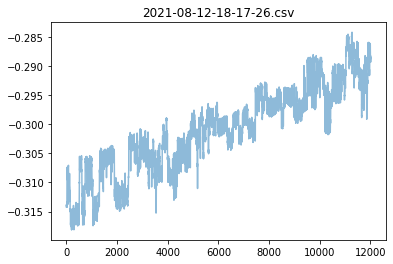

2021-08-12-18-17-26.csv


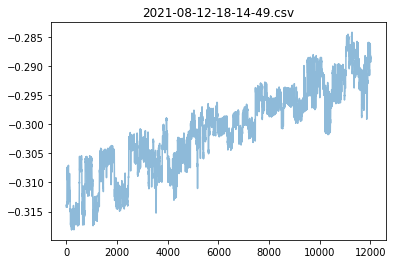

2021-08-12-18-14-49.csv


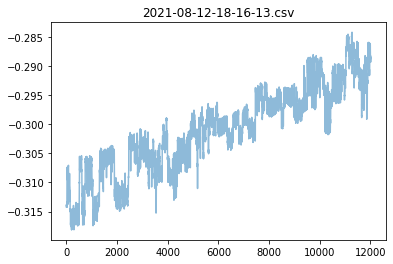

2021-08-12-18-16-13.csv


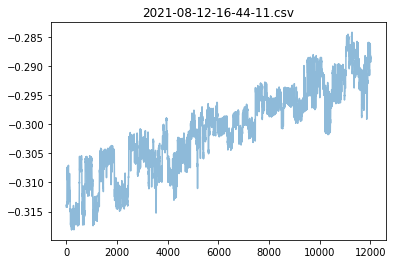

2021-08-12-16-44-11.csv


In [17]:
from os import listdir
from scipy.signal import find_peaks

decent_data = [
    "2021-08-12-19-52-38.csv",
    "2021-08-12-16-54-25.csv",
    "2021-08-13-22-21-24.csv",
    "2021-08-13-22-09-35.csv",
    "2021-08-12-18-16-41.csv",
    "2021-08-12-17-15-56.csv",
    "2021-08-12-19-50-43.csv",
    "2021-08-12-17-11-29.csv",
    "2021-08-12-18-13-47.csv",
    "2021-08-13-21-58-34.csv",
    "2021-08-12-18-15-36.csv",
    "2021-08-12-19-22-14.csv",
    "2021-08-12-18-17-26.csv",
    "2021-08-12-18-14-49.csv",
    "2021-08-12-18-16-13.csv",
    "2021-08-12-16-44-11.csv"
]

for file in decent_data:
    data = pd.read_csv("lumi6/l6_raw_data/"+file, header=None)
    data = pd.read_csv("cb_shutter_coupling_test/2021-08-19-19-50-59.csv", header=None)
    data = data.iloc[:, 0]
    data = data.dropna()
    plt.figure()
    plt.plot(data, "C0", alpha=0.5)
    plt.title(file)
    plt.show()
    print(file)
    

In [15]:
def timing_analysis_from_raw_data(filename):
    x_start = 10
    data = pd.read_csv(filename, header=None)[x_start:]
    dataA = data.iloc[:, 0]
    dataA = dataA.dropna()
    dataB = data.iloc[:, 1]
    dataB = dataB.dropna()
    filter_and_plot(dataA, filename + " - Channel A", x_start)
    filter_and_plot(dataB, filename + " - Channel B", x_start)
    

def filter_and_plot(data, channel, x_start):
    # Filter 
    filtered_data = data.copy(deep=True)
    box_len = 20
    filtered_data = np.convolve(filtered_data, np.ones(box_len), mode='valid') / box_len
    peaks = find_peaks(filtered_data)[0]
    troughs = find_peaks(-filtered_data, distance=20)[0]
    peaks_and_troughs = np.sort(np.concatenate([peaks, troughs]))
    x_vals = range(x_start, len(filtered_data)+x_start)

    trim_index = []
    for i, peak in enumerate(peaks_and_troughs[:-1]):
        if np.abs(peak - peaks_and_troughs[i+1]) < 5:
            trim_index.append(i+1)
    peaks_and_troughs = np.delete(peaks_and_troughs, trim_index)

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(data, label="Signal", alpha=0.5)
    plt.plot(x_vals, filtered_data, label="Peaks/Troughs")
    plt.plot(peaks_and_troughs+x_start, filtered_data[peaks_and_troughs], 'o', markersize=5)
    plt.title(f"{channel}")
    plt.show()

#     print(f"{peaks_and_troughs=}")
#     print(f"{np.diff(peaks_and_troughs)=}")
#     print(f"{np.diff(peaks_and_troughs, 2)=}")

    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    ax[0].set_title("Number of samples per open/close period")
    ax[0].bar(range(len(np.diff(peaks_and_troughs))), np.diff(peaks_and_troughs), width=0.5, alpha=0.5)
    ax[0].set_xlabel("Period index")
    ax[0].set_ylabel("# of samples")

    ax[1].hist(np.diff(peaks_and_troughs, 2), alpha=0.5)
    ax[1].set_title("Histogram of difference in # of samples between open/close")
    ax[1].set_xlabel("Difference in # of samples between adjacent open/close periods")
    ax[1].set_ylabel("Count")

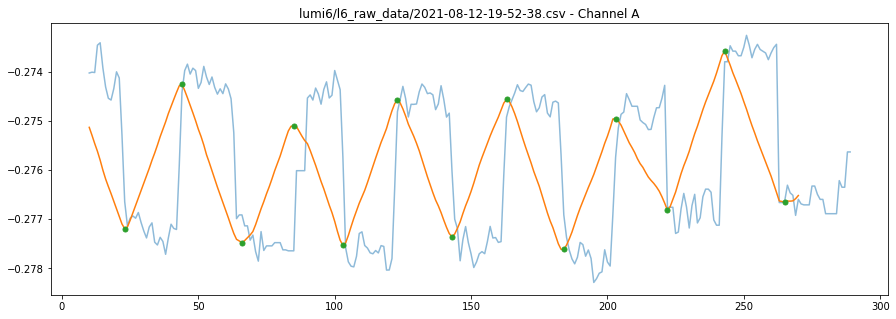

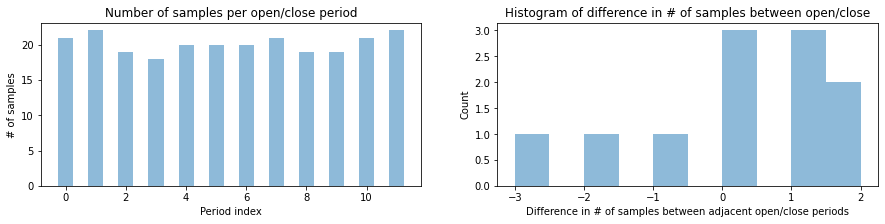

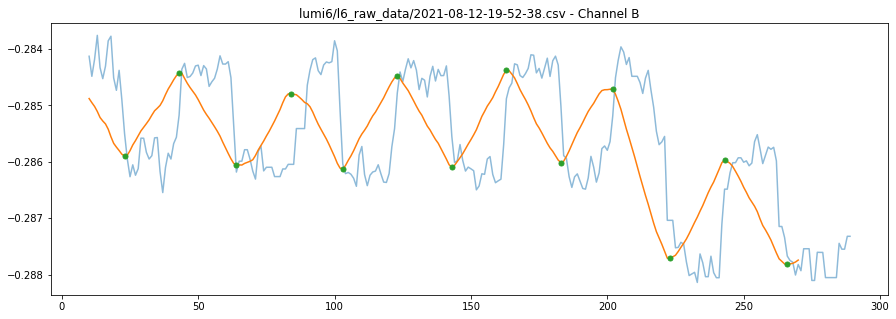

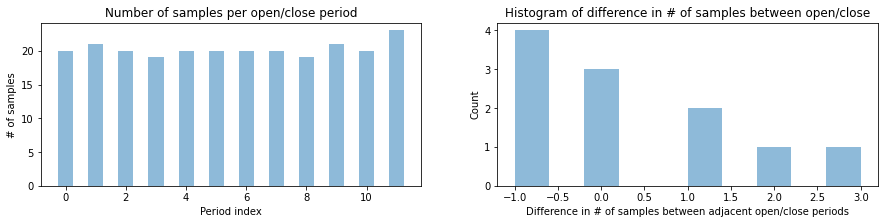

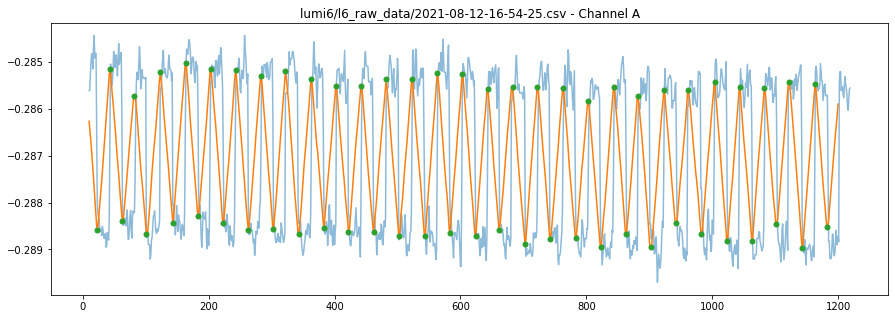

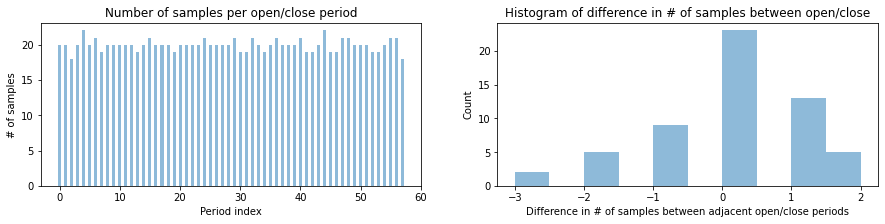

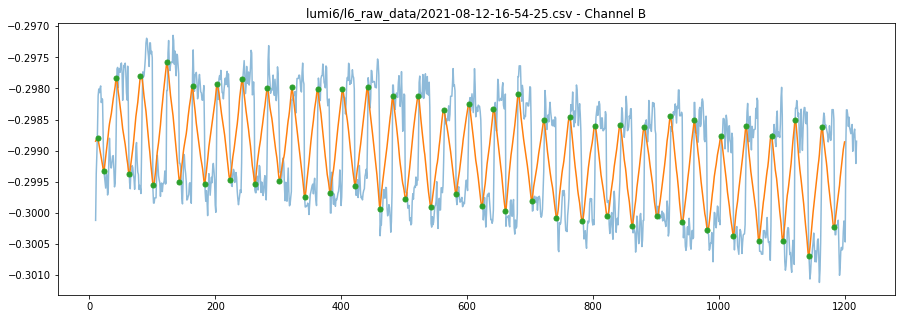

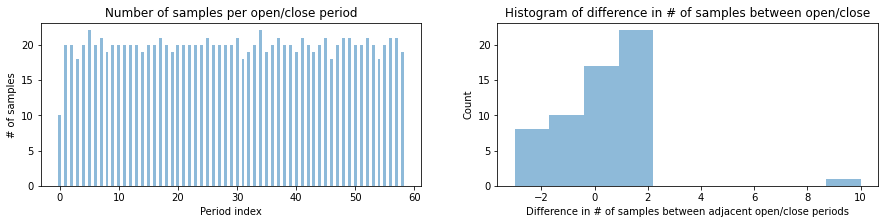

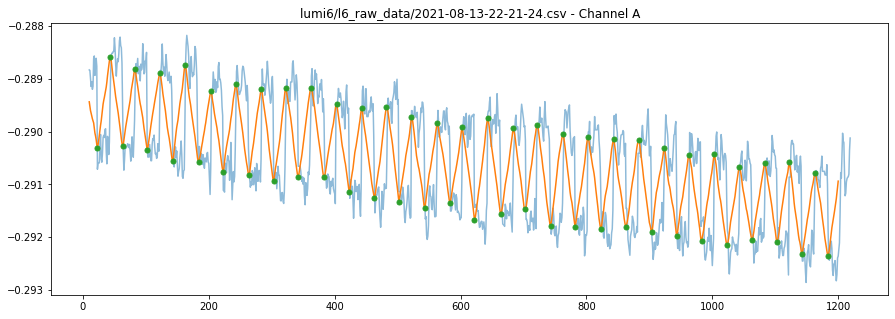

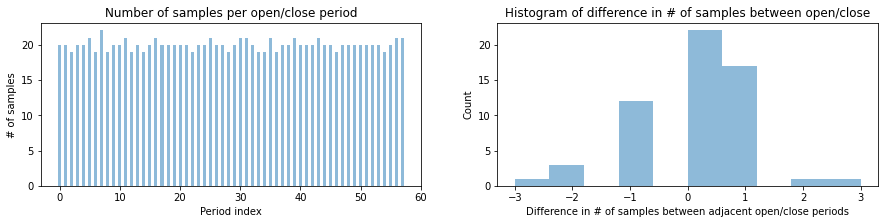

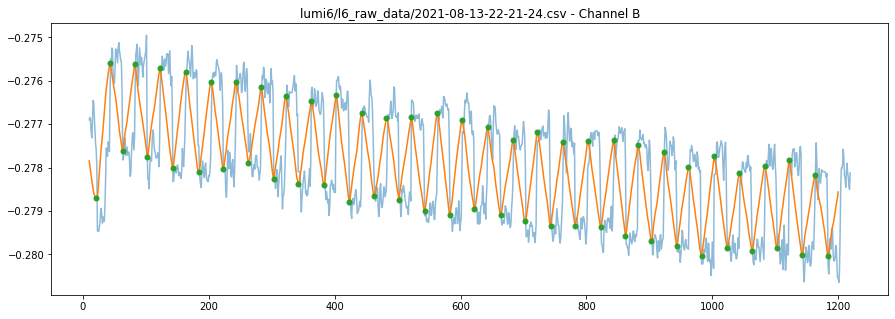

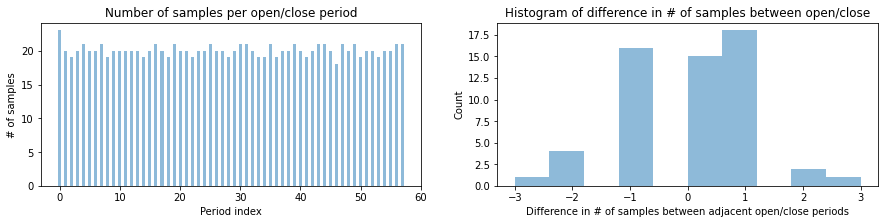

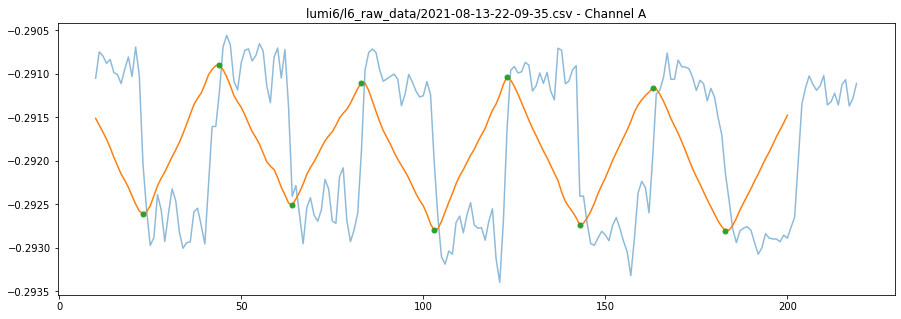

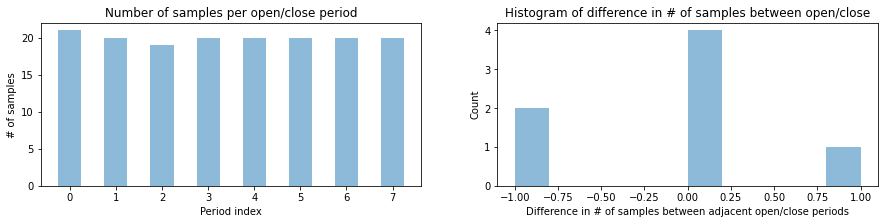

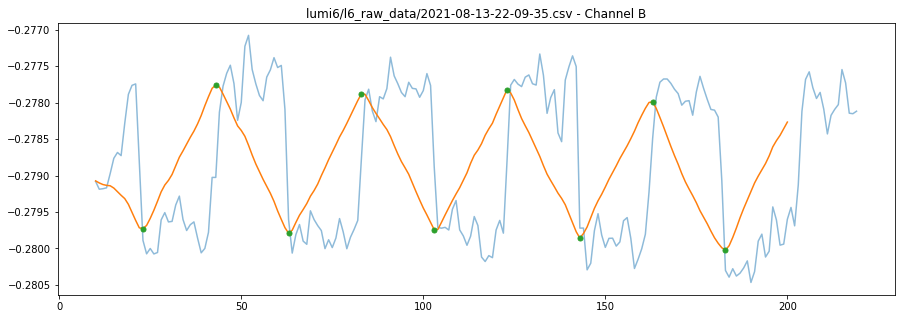

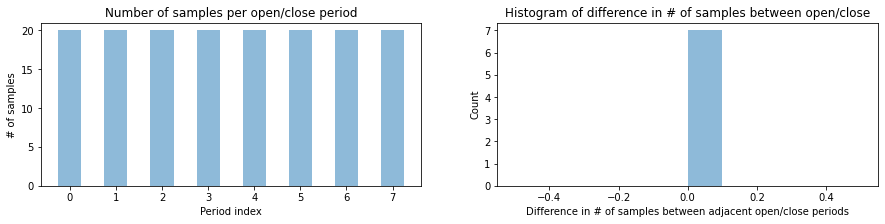

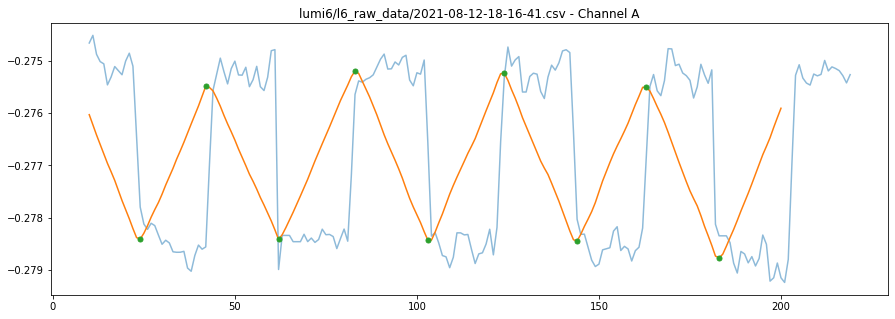

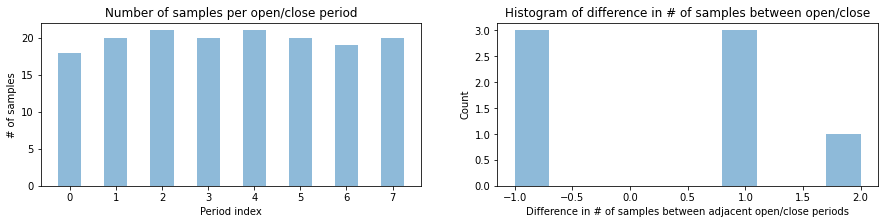

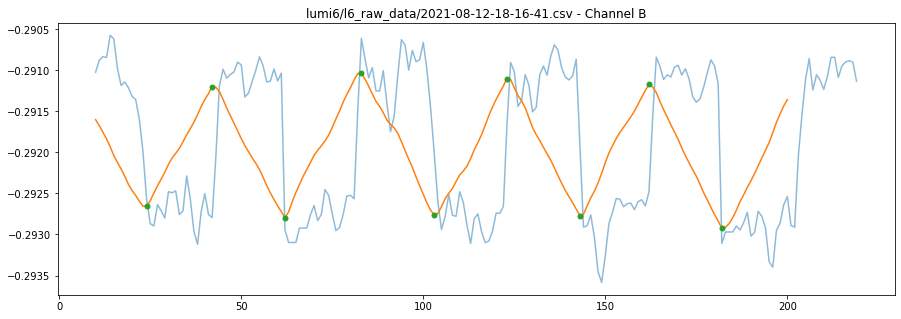

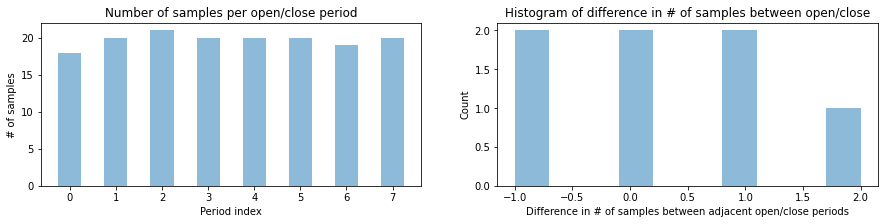

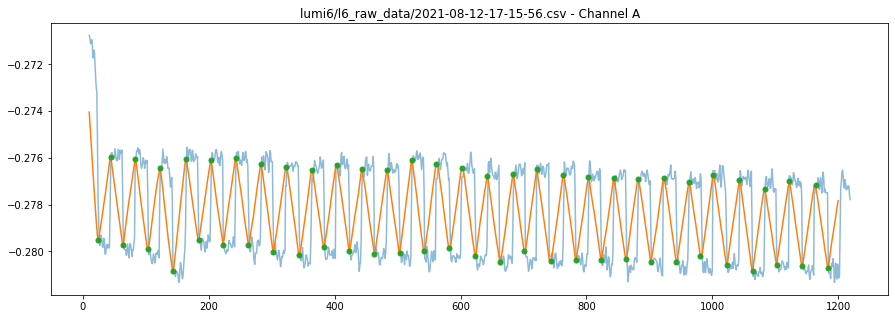

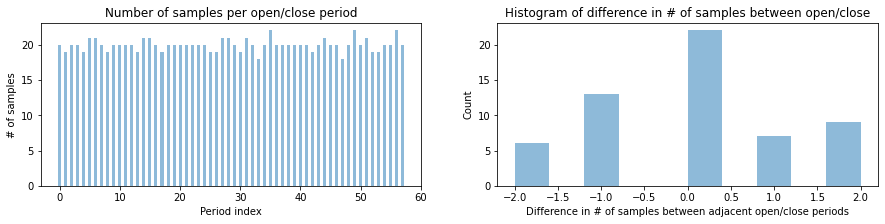

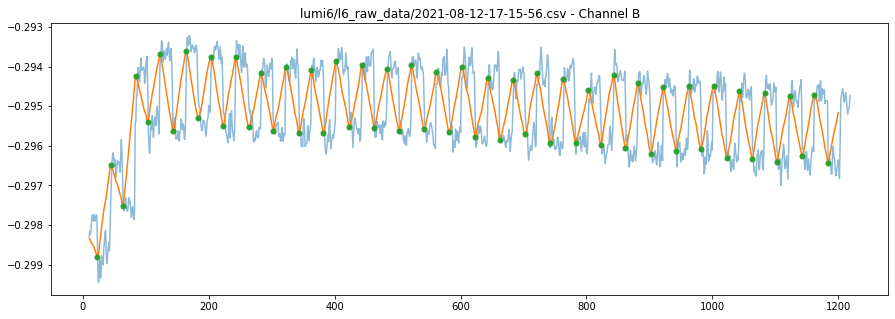

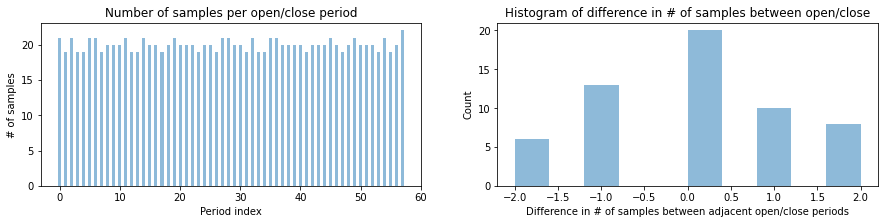

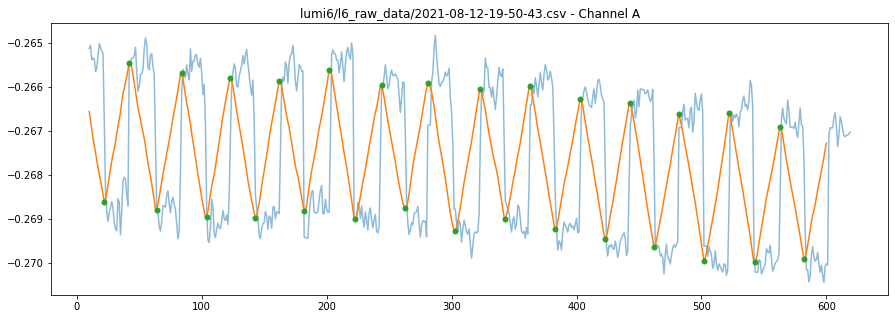

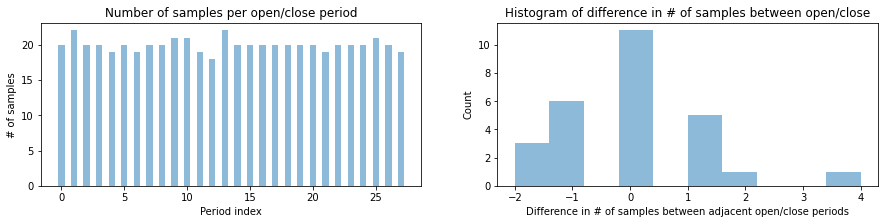

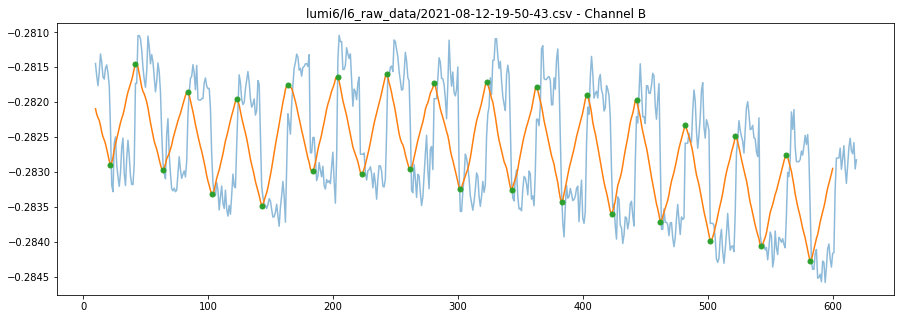

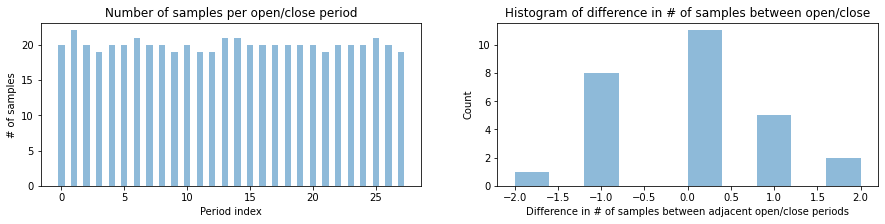

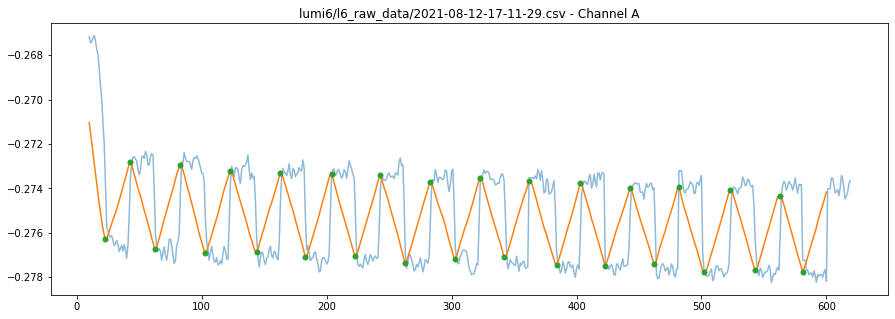

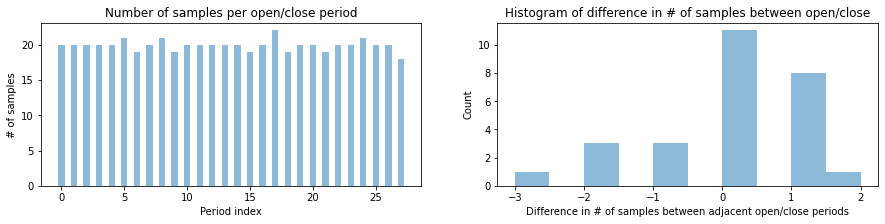

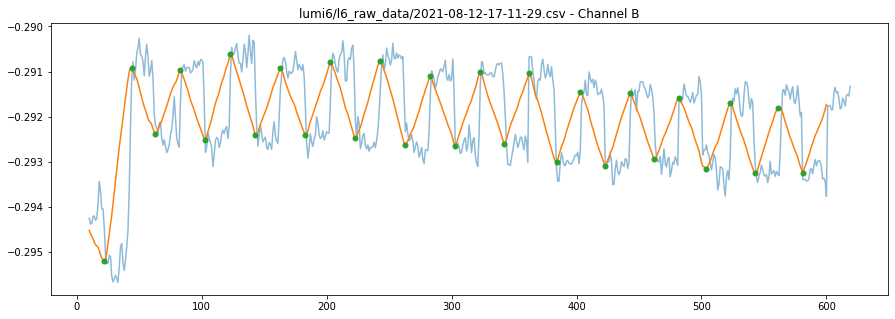

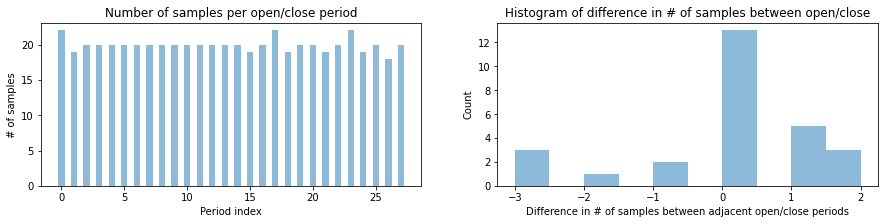

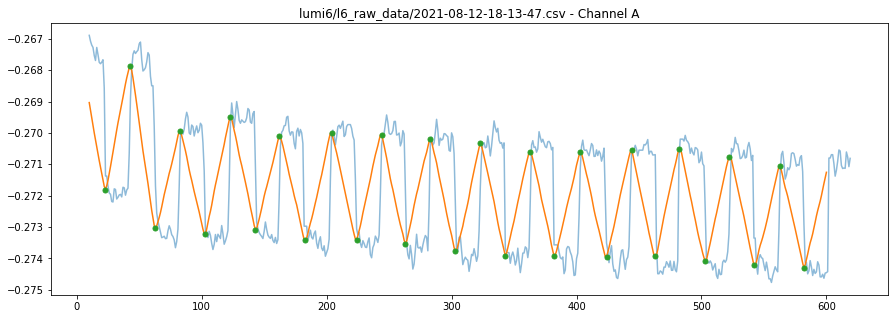

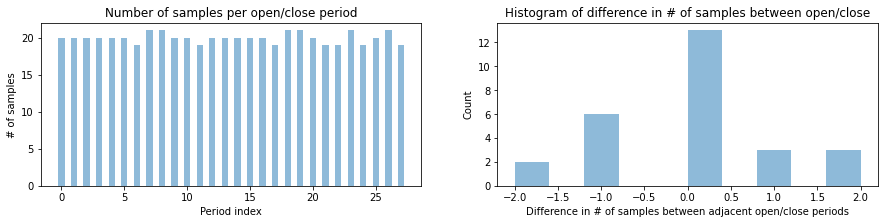

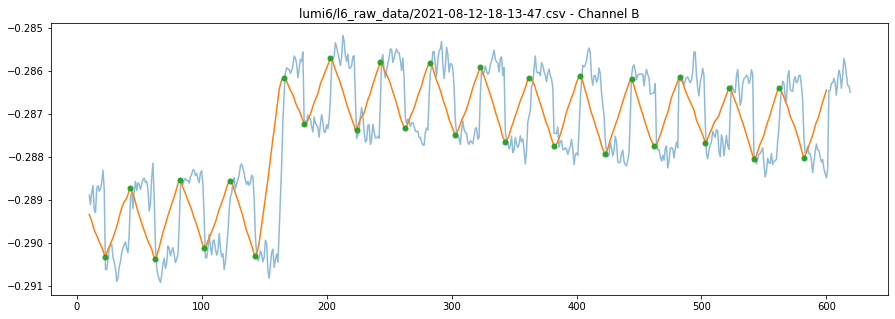

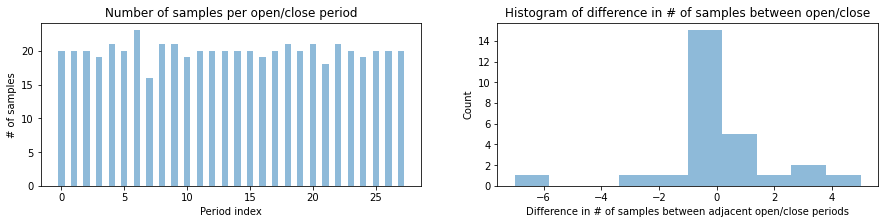

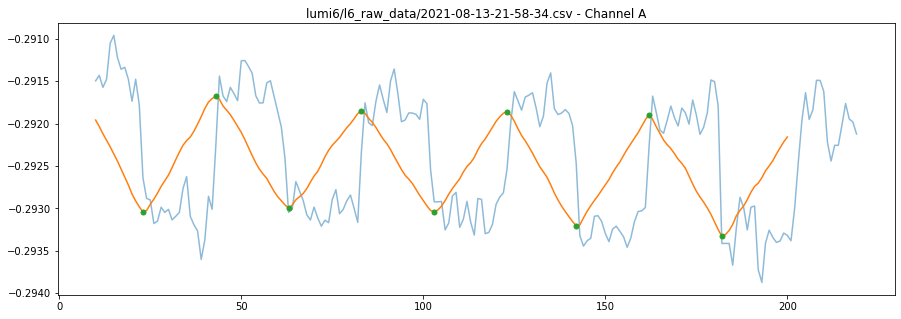

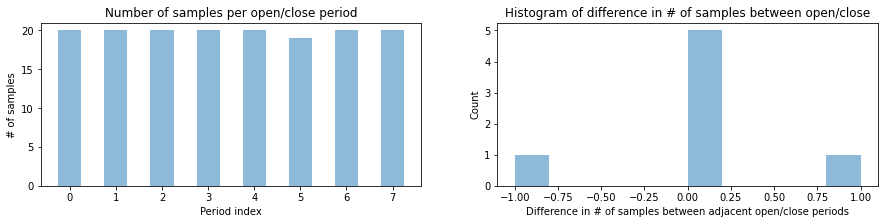

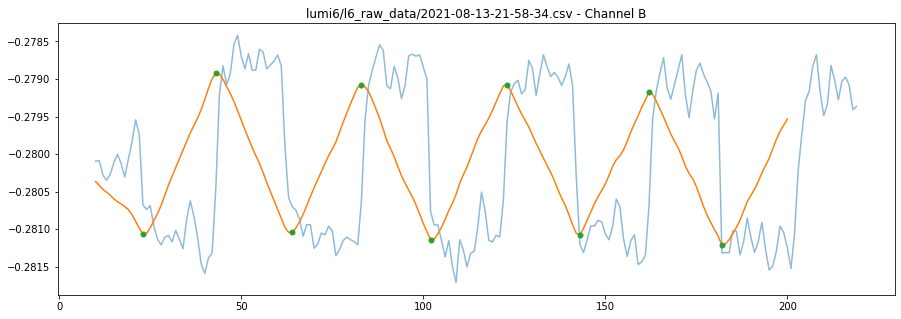

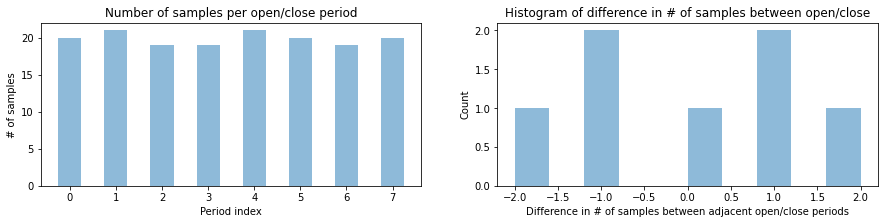

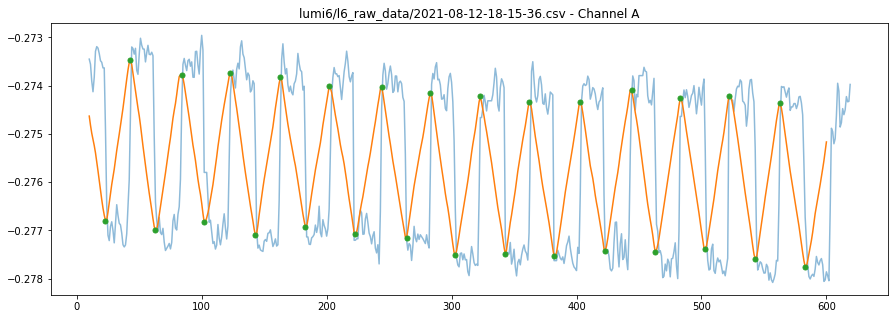

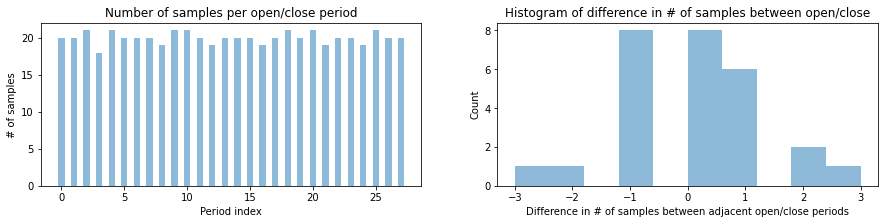

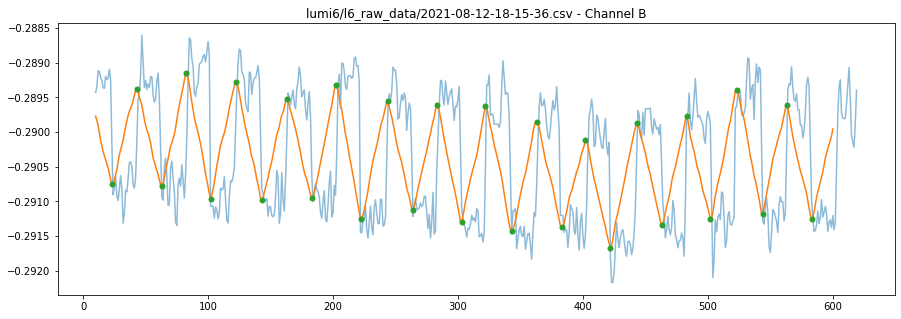

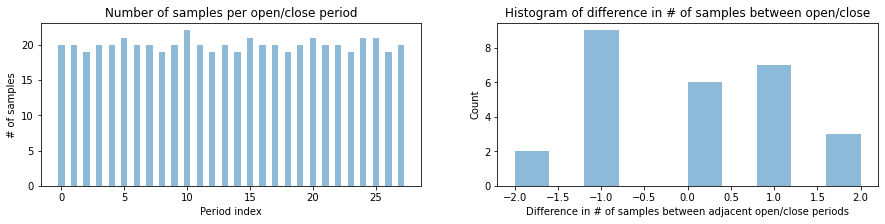

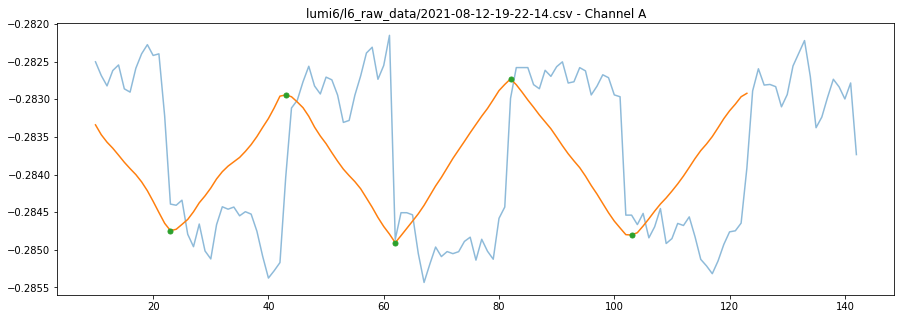

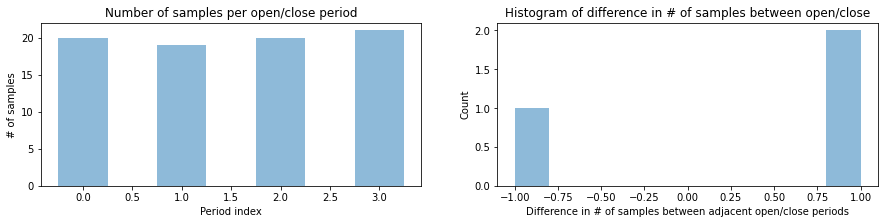

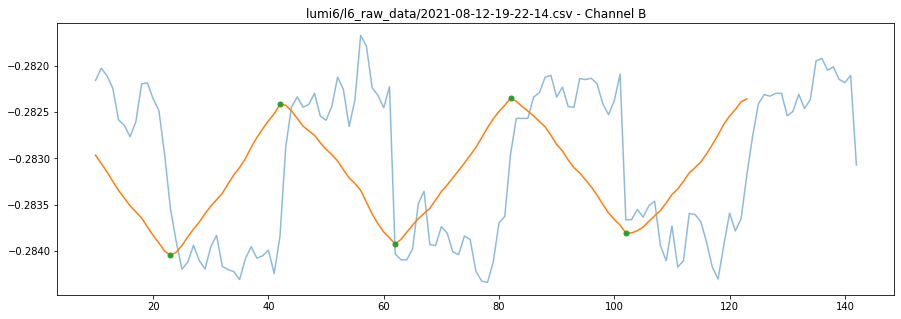

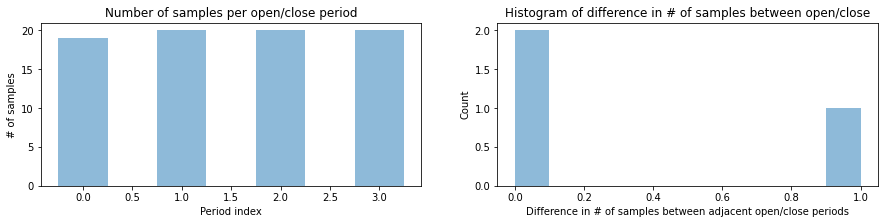

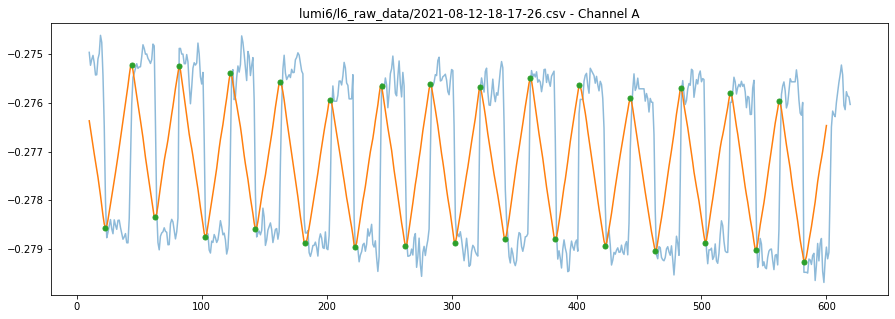

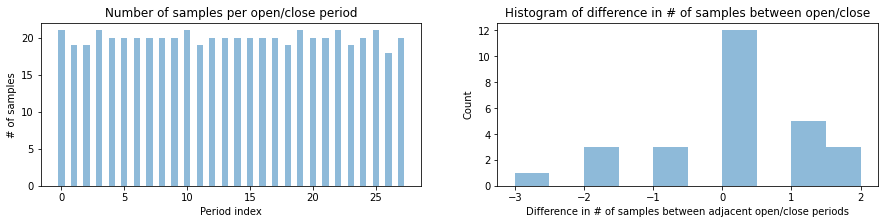

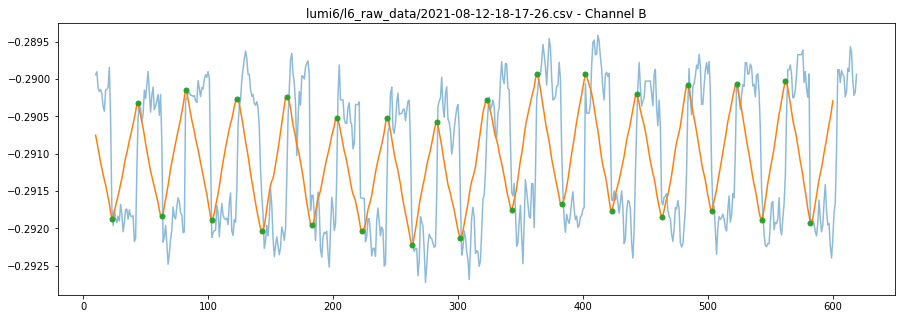

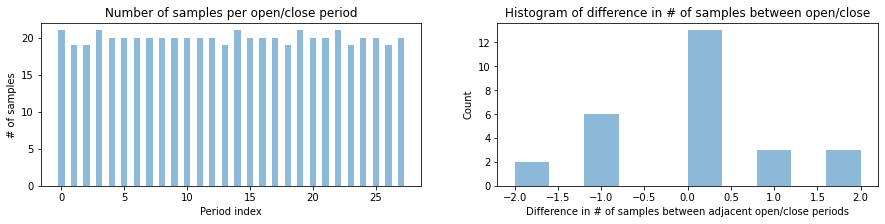

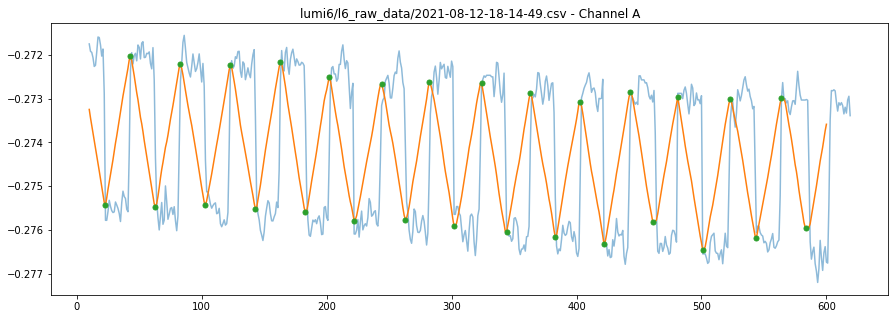

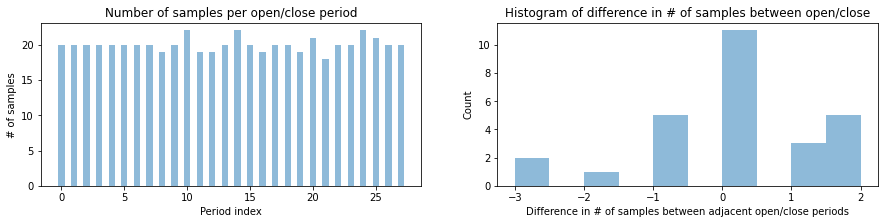

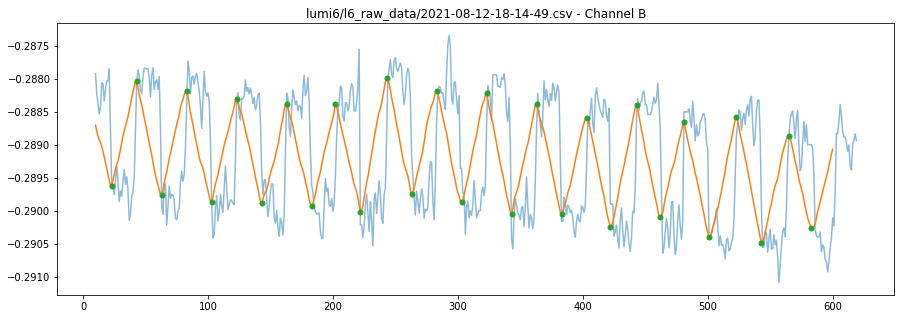

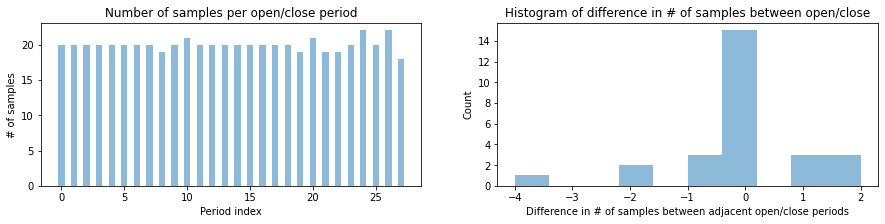

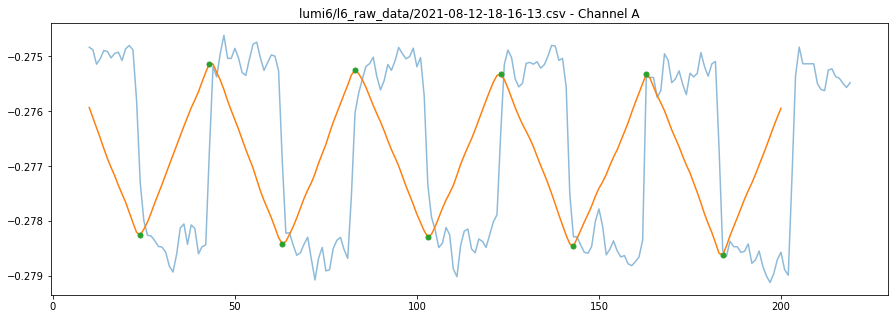

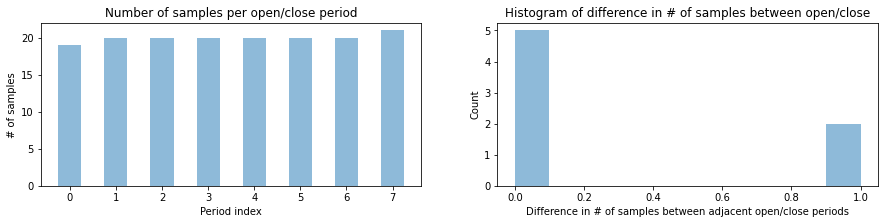

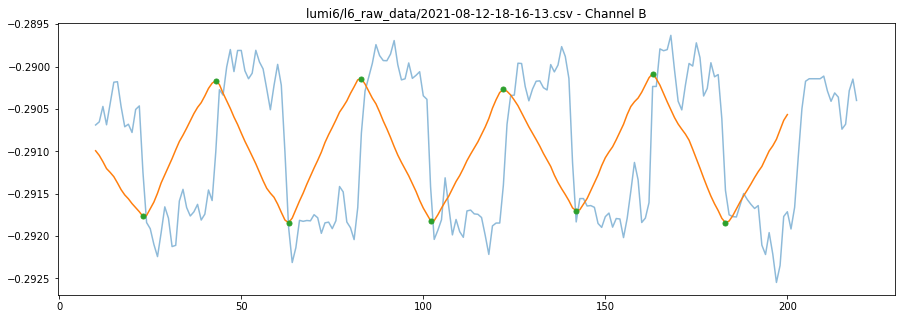

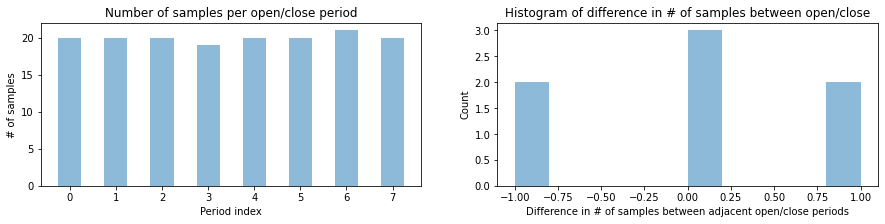

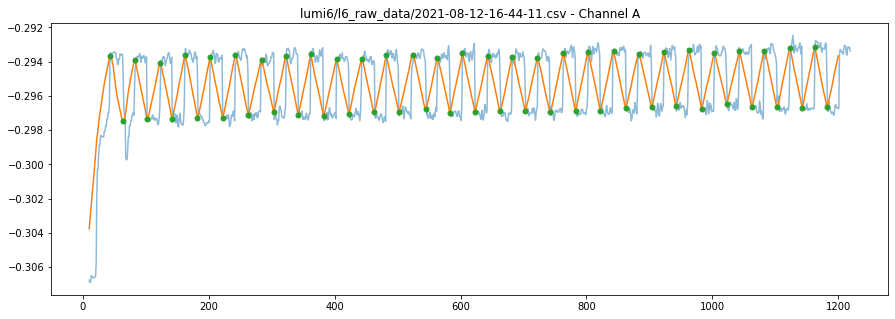

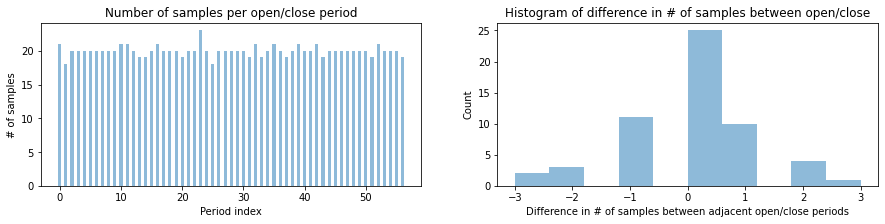

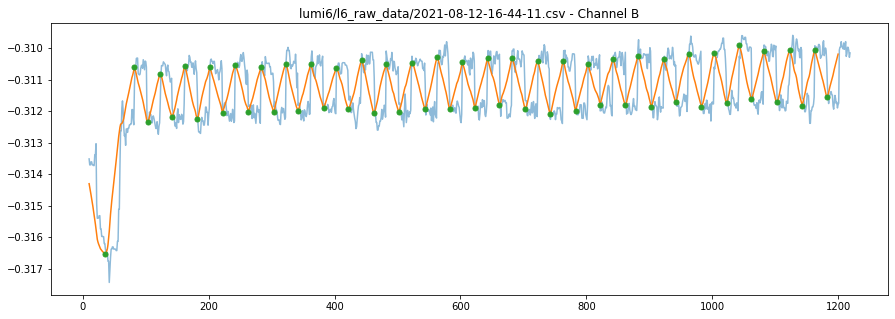

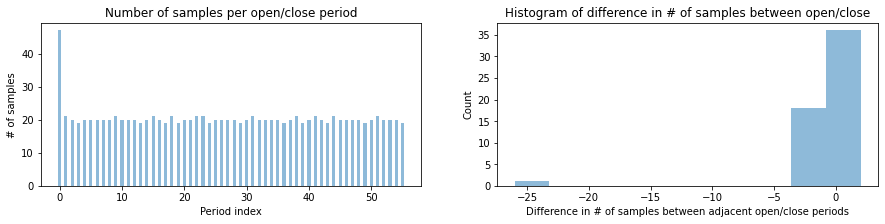

In [162]:
decent_data = [
    "lumi6/l6_raw_data/2021-08-12-19-52-38.csv",
    "lumi6/l6_raw_data/2021-08-12-16-54-25.csv",
    "lumi6/l6_raw_data/2021-08-13-22-21-24.csv",
    "lumi6/l6_raw_data/2021-08-13-22-09-35.csv",
    "lumi6/l6_raw_data/2021-08-12-18-16-41.csv",
    "lumi6/l6_raw_data/2021-08-12-17-15-56.csv",
    "lumi6/l6_raw_data/2021-08-12-19-50-43.csv",
    "lumi6/l6_raw_data/2021-08-12-17-11-29.csv",
    "lumi6/l6_raw_data/2021-08-12-18-13-47.csv",
    "lumi6/l6_raw_data/2021-08-13-21-58-34.csv",
    "lumi6/l6_raw_data/2021-08-12-18-15-36.csv",
    "lumi6/l6_raw_data/2021-08-12-19-22-14.csv",
    "lumi6/l6_raw_data/2021-08-12-18-17-26.csv",
    "lumi6/l6_raw_data/2021-08-12-18-14-49.csv",
    "lumi6/l6_raw_data/2021-08-12-18-16-13.csv",
    "lumi6/l6_raw_data/2021-08-12-16-44-11.csv"
]

for file in decent_data:
    timing_analysis_from_raw_data(file)

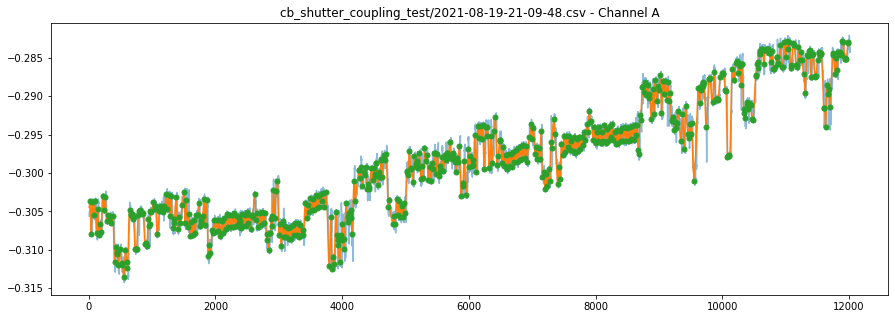

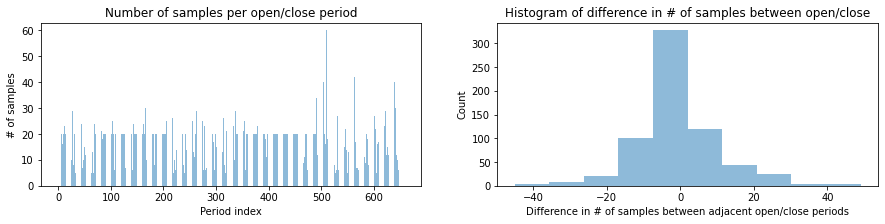

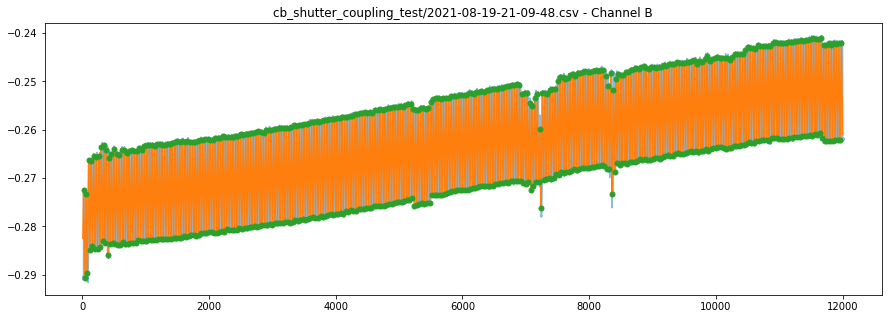

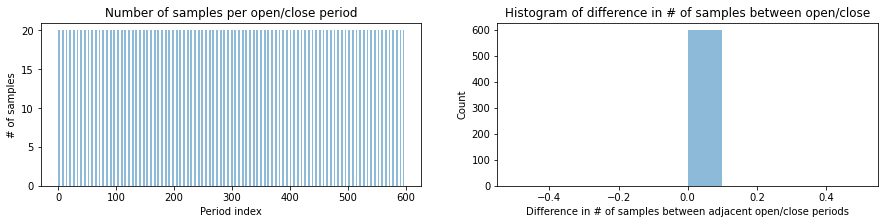

In [164]:
# Old code (no shutter/cb coupling)
filename = "cb_shutter_coupling_test/2021-08-19-21-31-23.csv"
# filename = "cb_shutter_coupling_test/lumi4_coupled_2021-08-19-22-22-19.csv"

# New shutter/cb coupling files (600s exposure each)
# filename = "cb_shutter_coupling_test/2021-08-19-19-50-59.csv"
filename = "cb_shutter_coupling_test/2021-08-19-21-09-48.csv"
timing_analysis_from_raw_data(filename)

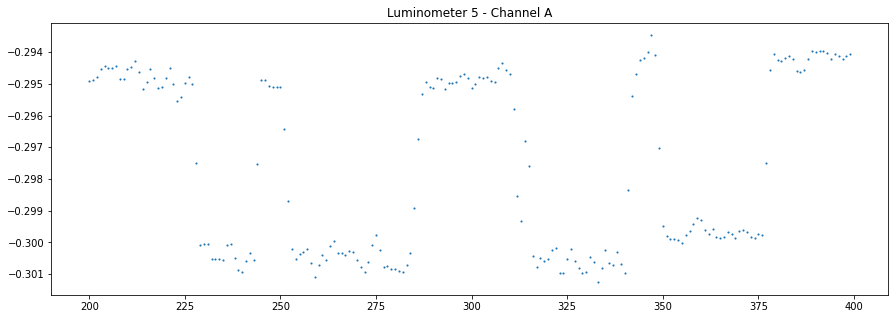

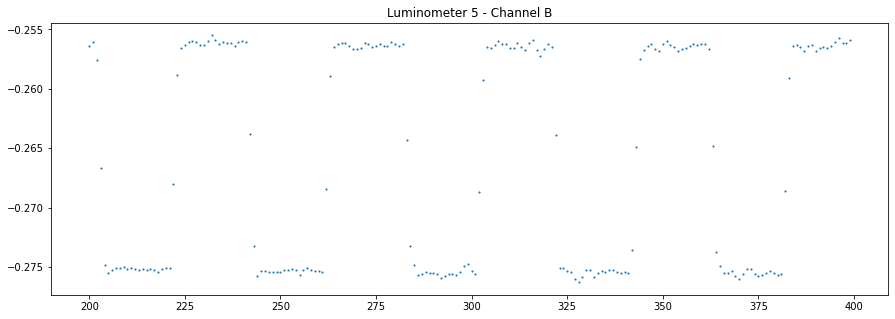

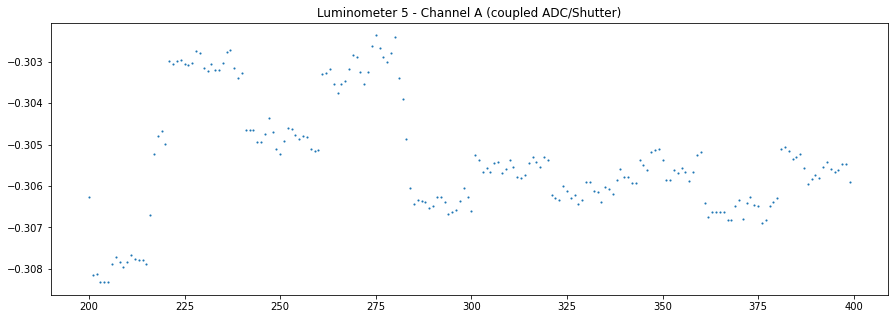

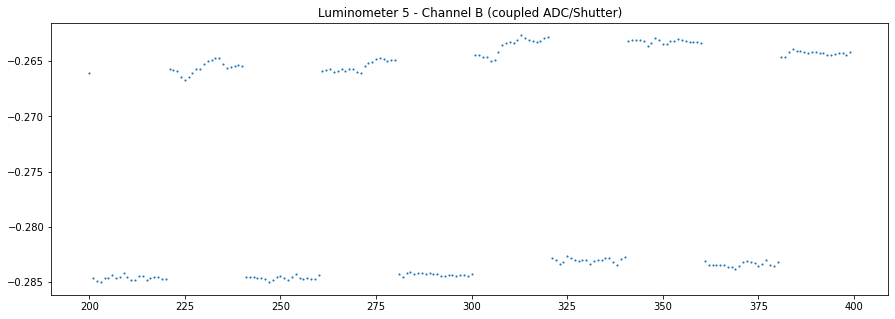

In [291]:
# Old code (no shutter/cb coupling)
filename = "cb_shutter_coupling_test/2021-08-19-21-31-23.csv"
data = pd.read_csv(filename, header=None)

start = 200
end = 400
plt.figure(figsize=(15, 5))
plt.title("Luminometer 5 - Channel A")
plt.plot(data.iloc[start:end, 0], 'o', markersize=1.1)
plt.figure(figsize=(15, 5))
plt.title("Luminometer 5 - Channel B")
plt.plot(data.iloc[start:end, 1], 'o', markersize=1.1)


# New shutter/cb coupling files (600s exposure each)
# filename = "cb_shutter_coupling_test/2021-08-19-19-50-59.csv"
filename = "cb_shutter_coupling_test/2021-08-19-21-09-48.csv"

data = pd.read_csv(filename, header=None)

plt.figure(figsize=(15, 5))
plt.title("Luminometer 5 - Channel A (coupled ADC/Shutter)")
plt.plot(data.iloc[start:end, 0], 'o', markersize=1.1)
plt.figure(figsize=(15, 5))
plt.title("Luminometer 5 - Channel B (coupled ADC/Shutter)")
plt.plot(data.iloc[start:end, 1], 'o', markersize=1.1)

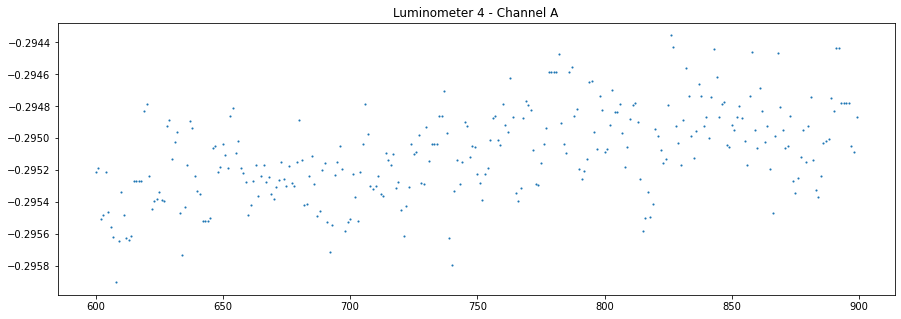

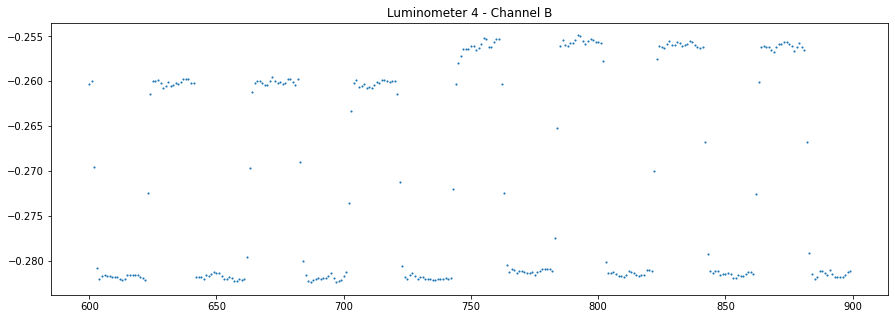

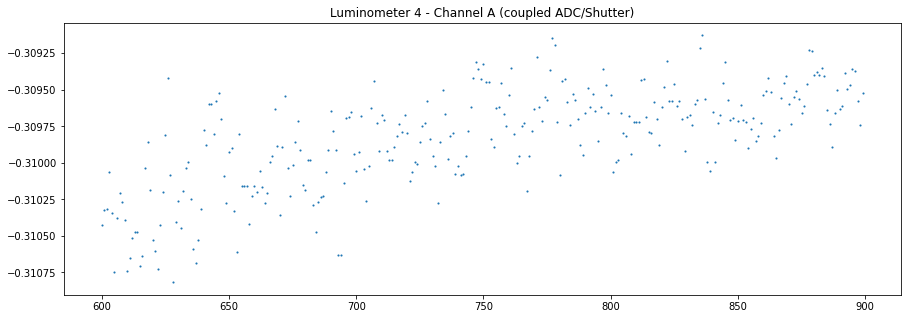

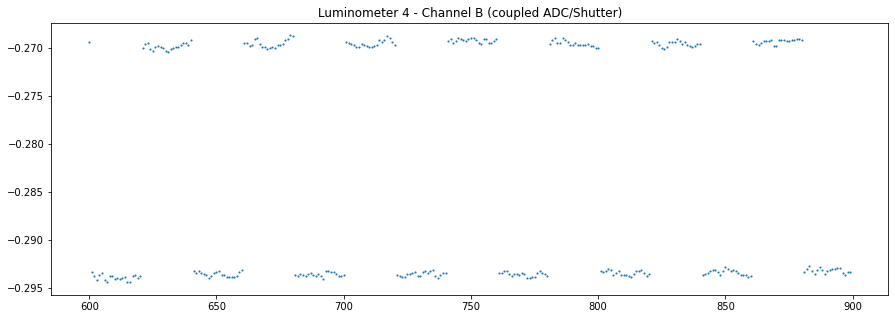

In [183]:
# # Old code (no shutter/cb coupling)
# filename = "cb_shutter_coupling_test/lumi4_coupled_2021-08-19-22-22-19.csv"
filename = "cb_shutter_coupling_test/lumi4_uncoupled_2021-08-19-22-47-18.csv"
data = pd.read_csv(filename, header=None)
luminometer = 4
start = 600
end = 900
plt.figure(figsize=(15, 5))
plt.title(f"Luminometer {luminometer} - Channel A")
plt.plot(data.iloc[start:end, 0], 'o', markersize=1.1)
plt.figure(figsize=(15, 5))
plt.title(f"Luminometer {luminometer} - Channel B")
plt.plot(data.iloc[start:end, 1], 'o', markersize=1.1)


# New shutter/cb coupling files (600s exposure each)
# filename = "cb_shutter_coupling_test/2021-08-19-19-50-59.csv"
filename = "cb_shutter_coupling_test/lumi4_coupled_2021-08-19-22-22-19.csv"
# filename = "cb_shutter_coupling_test/lumi8_uncoupled_2021-08-13-00-31-59.csv"
luminometer = 4

data = pd.read_csv(filename, header=None)

plt.figure(figsize=(15, 5))
plt.title(f"Luminometer {luminometer} - Channel A (coupled ADC/Shutter)")
plt.plot(data.iloc[start:end, 0], 'o', markersize=1.1)
plt.figure(figsize=(15, 5))
plt.title(f"Luminometer {luminometer} - Channel B (coupled ADC/Shutter)")
plt.plot(data.iloc[start:end, 1], 'o', markersize=1.1)

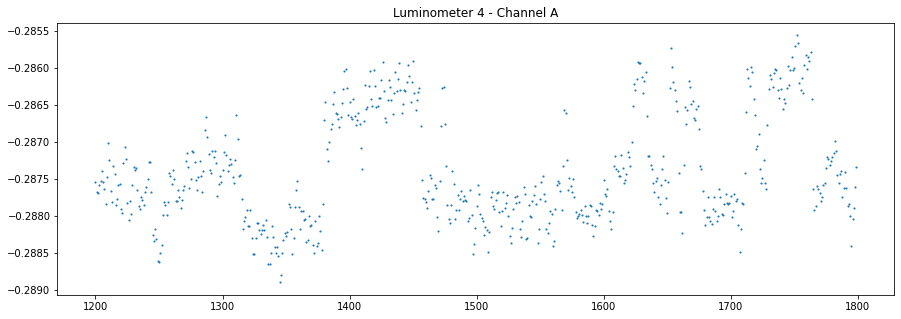

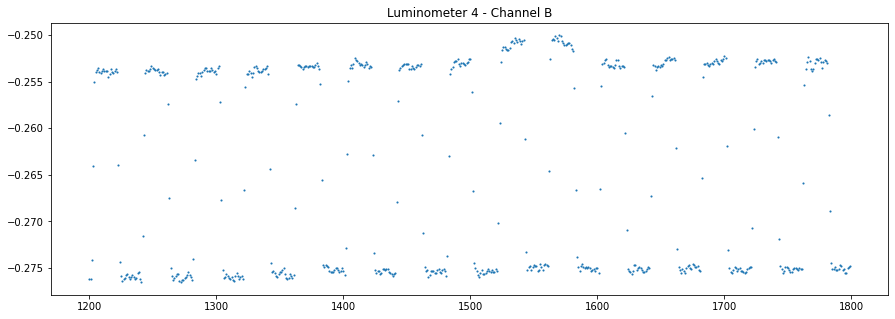

In [178]:
# Luminometer 4, running the old code (pre menu)
filename = "cb_shutter_coupling_test/lumi4_oldcode_2021-08-19-23-08-21.csv"
data = pd.read_csv(filename, header=None)
luminometer = 4
start = 1200
end = 1800
plt.figure(figsize=(15, 5))
plt.title(f"Luminometer {luminometer} - Channel A")
plt.plot(data.iloc[start:end, 0], 'o', markersize=1.1)
plt.figure(figsize=(15, 5))
plt.title(f"Luminometer {luminometer} - Channel B")
plt.plot(data.iloc[start:end, 1], 'o', markersize=1.1)

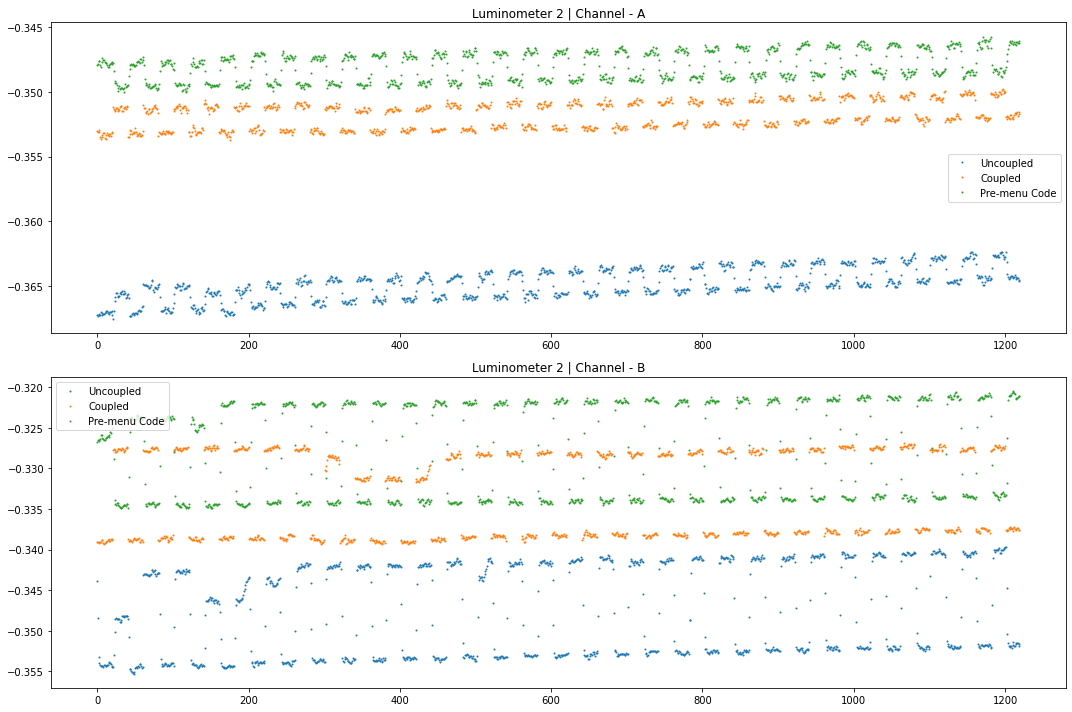

In [249]:
### Luminometer 2 
uncoupled = "Luminometer_2/uncoupled/2021-08-20-17-30-39.csv"
coupled = "Luminometer_2/coupled/2021-08-20-17-44-56.csv"
old = "Luminometer_2/Old Code/2021-08-20-17-48-19.csv"

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
channel = [0, 1]
for each in channel:
    ab = "A" if each == 0 else "B"
    ax[each].set_title(f"Luminometer 2 | Channel - {ab}")
    data = pd.read_csv(uncoupled, header=None)
    ax[each].plot(data.iloc[:, each], 'o', markersize=1, label="Uncoupled")

    data = pd.read_csv(coupled, header=None)
    ax[each].plot(data.iloc[:, each], 'o', markersize=1, label="Coupled")

    data = pd.read_csv(old, header=None)
    ax[each].plot(data.iloc[:, each], 'o', markersize=1, label="Pre-menu Code")
    ax[each].legend()
plt.tight_layout()

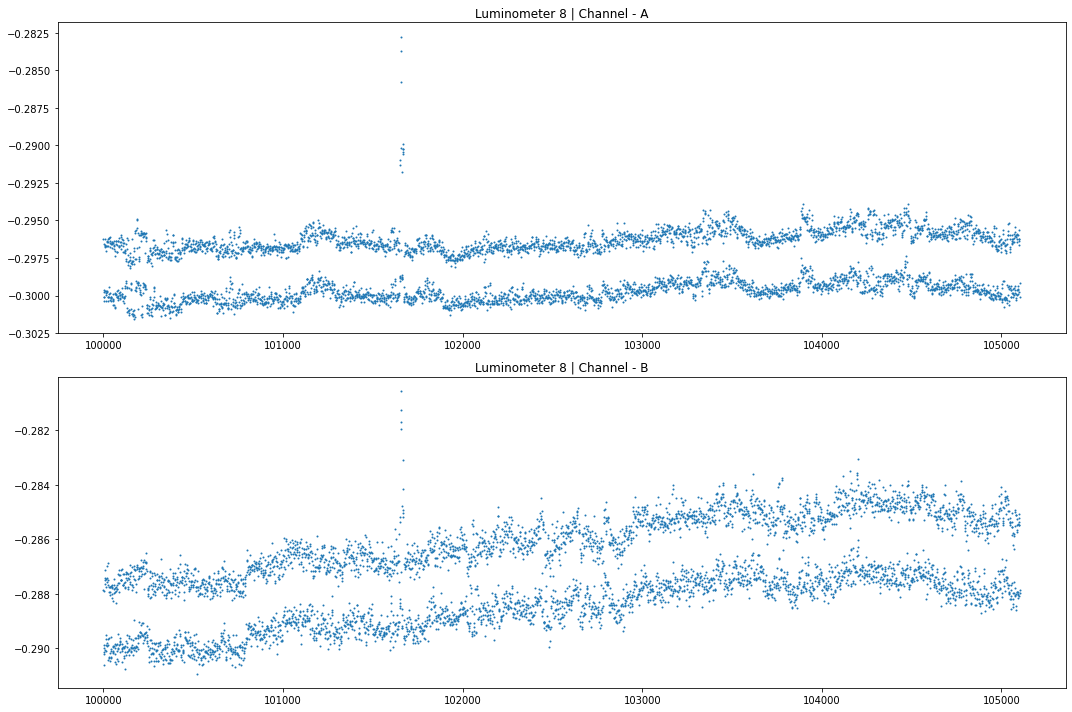

In [391]:
### Luminometer 8 
uncoupled = "Luminometer_8/uncoupled/2021-08-20-18-45-10.csv"
coupled = "Luminometer_8/coupled/STRESS-TEST-2021-Aug-20-21:32:17.csv"
old = "Luminometer_8/Old Code/2021-08-20-17-59-07.csv"


# coupled = "Luminometer_1/coupled/STRESS-TEST-2021-Aug-20-21:32:15.csv"
coupled = "Luminometer_4/STRESS-TEST-2021-Aug-20-23:45:09.csv"
# coupled = "Luminometer_8/coupled/STRESS-TEST-2021-Aug-20-21:32:17.csv"

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
channel = [0, 1]
for each in channel:
    ab = "A" if each == 0 else "B"
    ax[each].set_title(f"Luminometer 8 | Channel - {ab}")
#     data = pd.read_csv(uncoupled, header=None)
#     ax[each].plot(data.iloc[:, each], 'o', markersize=1, label="Uncoupled")

    data = pd.read_csv(coupled, header=None)[100000:]
    data = data[data < 0]
    ax[each].plot(data.iloc[:, each], 'o', markersize=1)
    fig.canvas.draw()


#     data = pd.read_csv(old, header=None)
#     ax[each].plot(data.iloc[:, each], 'o', markersize=1, label="Pre-menu Code")
plt.tight_layout()


Luminometer 1
46846.0 0.027742802876715253 100.0
46851.0 0.014938751120406333 100.0
=====
46847.0 0.025608741116967926 100.0
46849.0 0.019206965726236716 100.0
=====
Luminometer 4
43423.0 0.029929091076526384 100.0
43424.0 0.02762685330140897 100.0
=====
43426.0 0.02302237775117414 100.0
43430.0 0.013813426650704485 100.0
=====
Luminometer 8
43275.0 0.2834231992257708 99.99999999999999
43203.0 0.4493294621871976 100.0
=====
43217.0 0.41706991105580904 99.99999999999999
43224.0 0.40094013549011476 100.0
=====


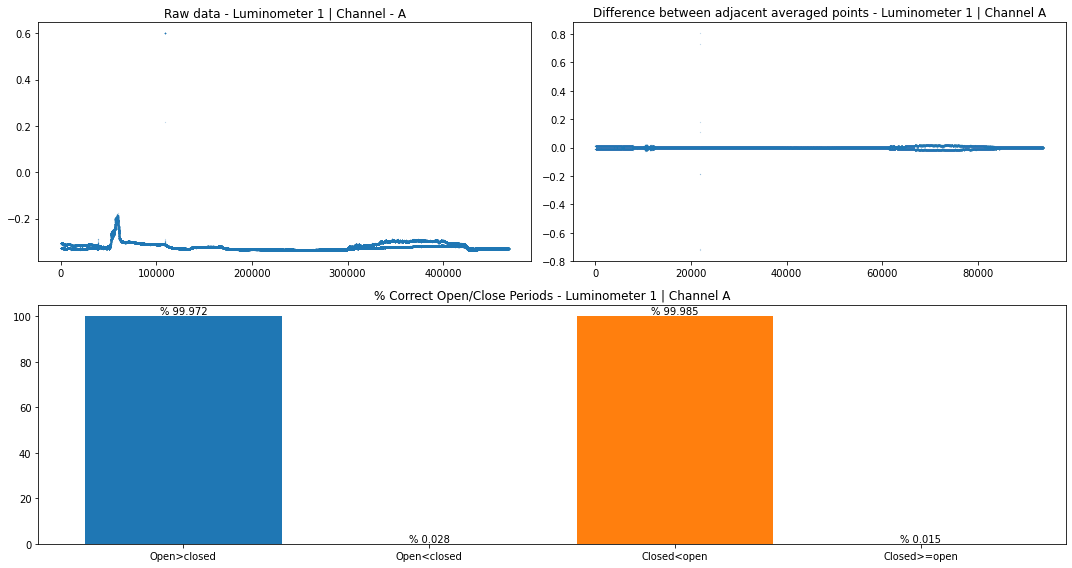

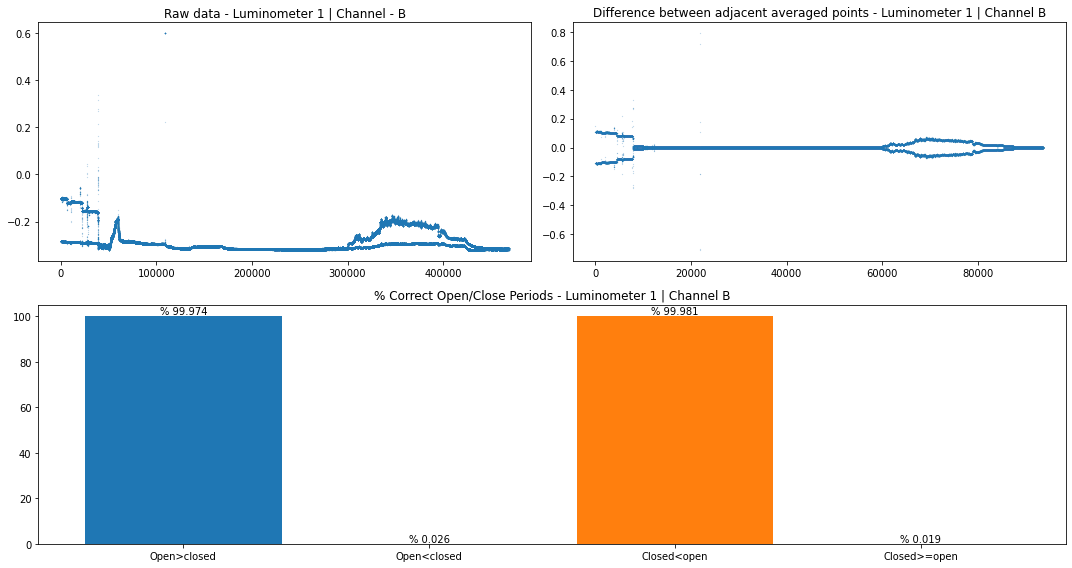

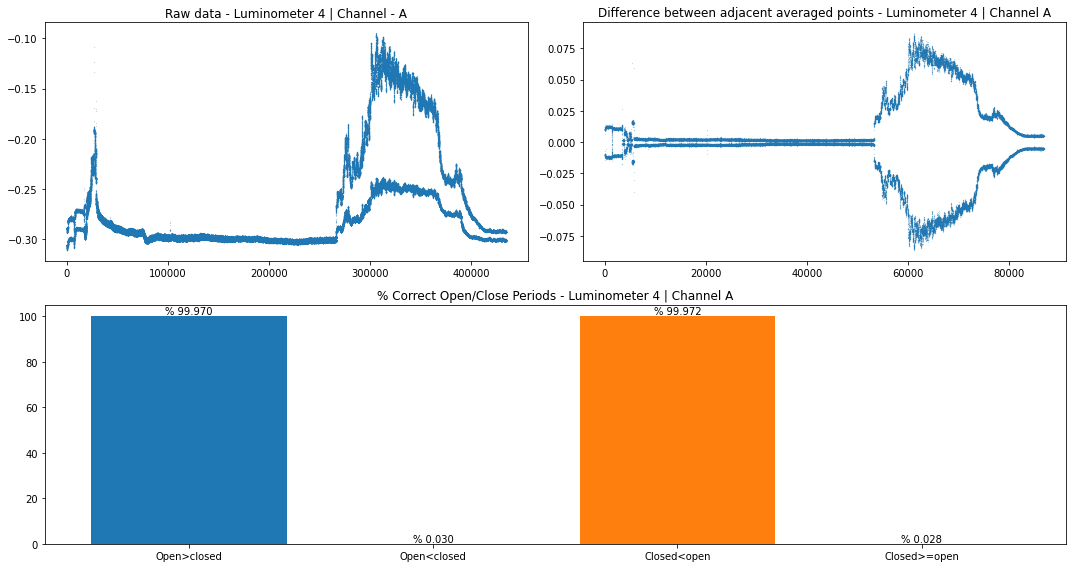

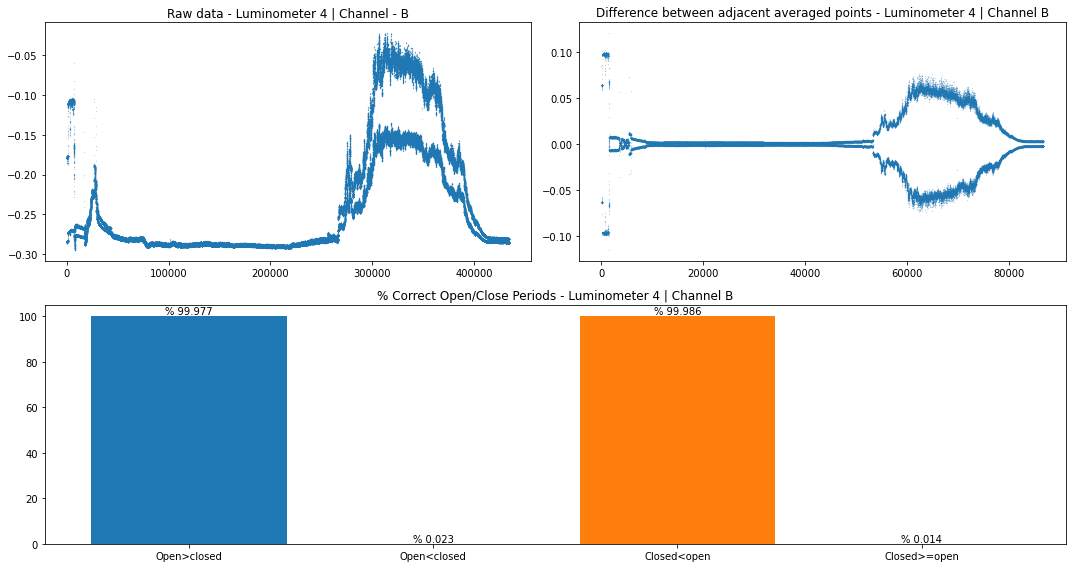

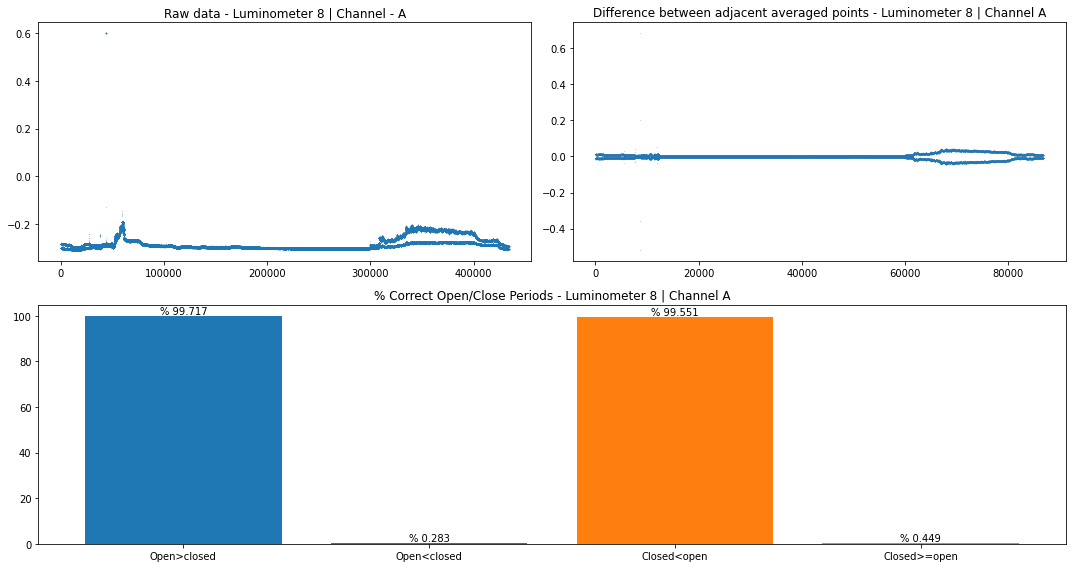

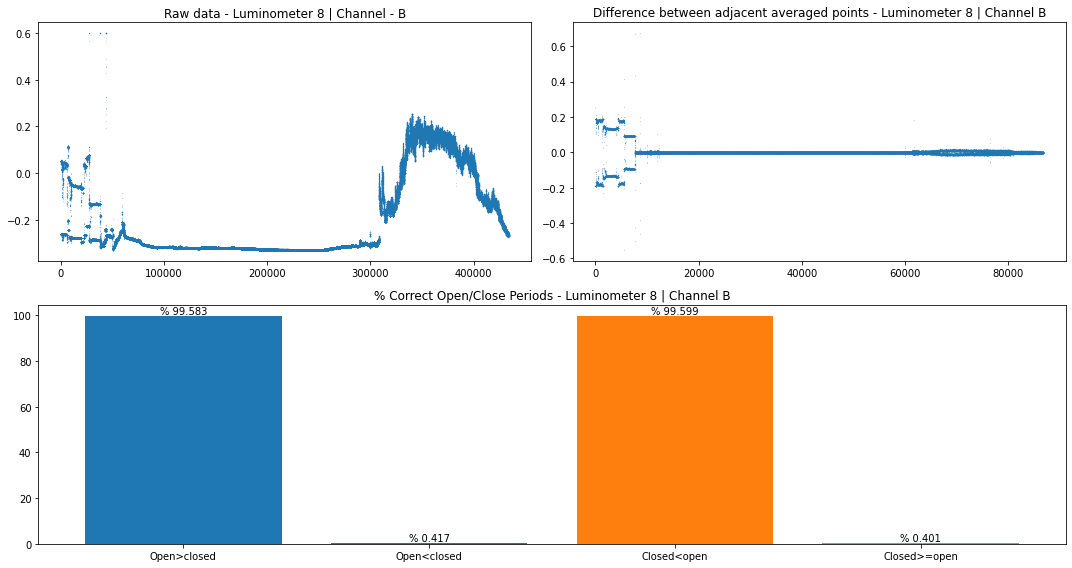

In [636]:
shutter_test = {
    1: "Luminometer_1/coupled/STRESS-TEST-2021-Aug-20-21:32:15.csv",
    4: "Luminometer_4/STRESS-TEST-2021-Aug-20-23:45:09.csv",
    8: "Luminometer_8/coupled/STRESS-TEST-2021-Aug-20-21:32:17.csv"
}

for key in shutter_test.keys():
    filename = shutter_test[key]
    start = 0
    end = -1
    data = pd.read_csv(filename, header=None)[start:end]
    print(f"Luminometer {key}")

    for channel in range(2):
        plt.figure(figsize=(15, 8))
        ch = data.iloc[:, channel]
        ab = "A" if channel == 0 else "B"
        
        # Each open/close period consists of 5 measurements
        # Note normally there are 20 points, but to reduce the file
        # size for the stress test, only every fourth point is recorded
        n = 5
        max_index = (len(ch) // n) * n
        ch = ch[:max_index]
        
        # Original data
        plt.subplot(2, 2, 1)
        plt.title(f"Raw data - Luminometer {key} | Channel - {ab}")
        plt.plot(ch, 'o', markersize=0.1)
    
        # Reshape array to a series of columns each of length n, then average along those columns
        vals = np.average(ch.to_numpy().reshape(-1, n), axis=1)
        
        # Averaged data
#         ax[0, 1].plot(vals, 'o', markersize=1)
#         ax[0, 1].set_title("Raw data - averaging every 5 points")
        
        # Difference between adjacent values
        diffs = np.diff(vals)
        
        plt.subplot(2, 2, 2)
        plt.plot(diffs, 'o', markersize=0.1)
        plt.title(f"Difference between adjacent averaged points - Luminometer {key} | Channel {ab}")
        
        total_open = len(diffs[0::2])
        total_closed = len(diffs[1::2])
        true_open = np.count_nonzero(diffs[0::2] > 0) / total_open * 100
        false_open = np.count_nonzero(diffs[0::2] <= 0) / total_open * 100
        true_closed = np.count_nonzero(diffs[1::2] < 0) / total_closed * 100
        false_closed = np.count_nonzero(diffs[1::2] >= 0) / total_closed * 100
        
        print(true_open*total_open/100, false_open, true_open+false_open)
        print(true_closed*total_closed/100, false_closed, true_closed+false_closed)
        print("=====")
        
        plt.subplot(2, 1, 2)
        plt.title(f"% Correct Open/Close Periods - Luminometer {key} | Channel {ab}")
        r1 = plt.bar(["Open>closed", "Open<closed"], [true_open, false_open])
        r2 = plt.bar(["Closed<open", "Closed>=open"], [true_closed, false_closed])
        
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                        '%% %.3f' % height,
                        ha='center', va='bottom')
        autolabel(r1)
        autolabel(r2)
        
        plt.tight_layout()

0.04056267658573987
0.01108214547731414


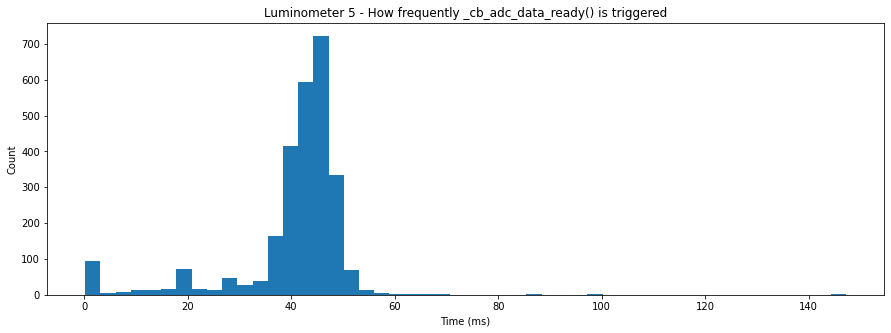

In [288]:
### Luminometer 5 CB callback timing (how often is the ADC triggering)
df = pd.read_csv("Luminometer_5/2021-Aug-20-22:11:14-cb_callback_timing.csv")

plt.figure(figsize=(15, 5))
plt.title("Luminometer 5 - How frequently _cb_adc_data_ready() is triggered")
plt.hist(df*1000, bins=50);
plt.xlabel("Time (ms)")
plt.ylabel("Count")
print(np.mean(df.iloc[:, 0]))
print(np.std(df.iloc[:, 0]))
# print(df.head())